# Investment Portfolio Recommendation Given Client Preferences

**Theme:** Portfolio recommendation given client preferences

**Members:** Tetsu Kurumisawa, Mina Bengi Aral

## Setup
Install dependencies. For this project, we will be using the API of yahooquery.

In [ ]:
# !pip install yahooquery

Import libraries.

In [1]:
from yahooquery import Ticker # to fetch financial data from yahoooquery
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to provide the client with a visual representation of the investment decision explanation
import random

import yfinance as yf # to check for ticker validity

import warnings # to avoid clutter from data processing

warnings.filterwarnings(action='ignore')

## Defined Variables

In [2]:
# number of stocks per portfolio based on size
SMALL = 4
MEDIUM = 8
LARGE = 16

# number of times the program attempts to swap a stock to find a sutiable portfolio before giving up
MAX_ATTEMPTS = 5

# List of sectors desired by user
DESIRED_SECTORS = []

# stock tickers for S&P 500
SP_LIST = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']

# dictionary for stock tickers (key) and the sector of each (value)
STOCK_SECTOR_DICT = {'MMM': 'Industrials', 'AOS': 'Industrials', 'ABT': 'Healthcare', 'ABBV': 'Healthcare', 'ACN': 'Technology', 'ADBE': 'Technology', 'AMD': 'Technology', 'AES': 'Utilities', 'AFL': 'Financial Services', 'A': 'Healthcare', 'APD': 'Basic Materials', 'ABNB': 'Consumer Cyclical', 'AKAM': 'Technology', 'ALB': 'Basic Materials', 'ARE': 'Real Estate', 'ALGN': 'Healthcare', 'ALLE': 'Industrials', 'LNT': 'Utilities', 'ALL': 'Financial Services', 'GOOGL': 'Communication Services', 'GOOG': 'Communication Services', 'MO': 'Consumer Defensive', 'AMZN': 'Consumer Cyclical', 'AMCR': 'Consumer Cyclical', 'AEE': 'Utilities', 'AAL': 'Industrials', 'AEP': 'Utilities', 'AXP': 'Financial Services', 'AIG': 'Financial Services', 'AMT': 'Real Estate', 'AWK': 'Utilities', 'AMP': 'Financial Services', 'AME': 'Industrials', 'AMGN': 'Healthcare', 'APH': 'Technology', 'ADI': 'Technology', 'ANSS': 'Technology', 'AON': 'Financial Services', 'APA': 'Energy', 'AAPL': 'Technology', 'AMAT': 'Technology', 'APTV': 'Consumer Cyclical', 'ACGL': 'Financial Services', 'ADM': 'Consumer Defensive', 'ANET': 'Technology', 'AJG': 'Financial Services', 'AIZ': 'Financial Services', 'T': 'Communication Services', 'ATO': 'Utilities', 'ADSK': 'Technology', 'ADP': 'Industrials', 'AZO': 'Consumer Cyclical', 'AVB': 'Real Estate', 'AVY': 'Consumer Cyclical', 'AXON': 'Industrials', 'BKR': 'Energy', 'BALL': 'Consumer Cyclical', 'BAC': 'Financial Services', 'BK': 'Financial Services', 'BBWI': 'Consumer Cyclical', 'BAX': 'Healthcare', 'BDX': 'Healthcare', 'BRK-B': 'Financial Services', 'BBY': 'Consumer Cyclical', 'BIO': 'Healthcare', 'TECH': 'Healthcare', 'BIIB': 'Healthcare', 'BLK': 'Financial Services', 'BX': 'Financial Services', 'BA': 'Industrials', 'BKNG': 'Consumer Cyclical', 'BWA': 'Consumer Cyclical', 'BXP': 'Real Estate', 'BSX': 'Healthcare', 'BMY': 'Healthcare', 'AVGO': 'Technology', 'BR': 'Technology', 'BRO': 'Financial Services', 'BF-B': 'Consumer Defensive', 'BLDR': 'Industrials', 'BG': 'Consumer Defensive', 'CDNS': 'Technology', 'CZR': 'Consumer Cyclical', 'CPT': 'Real Estate', 'CPB': 'Consumer Defensive', 'COF': 'Financial Services', 'CAH': 'Healthcare', 'KMX': 'Consumer Cyclical', 'CCL': 'Consumer Cyclical', 'CARR': 'Industrials', 'CTLT': 'Healthcare', 'CAT': 'Industrials', 'CBOE': 'Financial Services', 'CBRE': 'Real Estate', 'CDW': 'Technology', 'CE': 'Basic Materials', 'COR': 'Healthcare', 'CNC': 'Healthcare', 'CNP': 'Utilities', 'CF': 'Basic Materials', 'CHRW': 'Industrials', 'CRL': 'Healthcare', 'SCHW': 'Financial Services', 'CHTR': 'Communication Services', 'CVX': 'Energy', 'CMG': 'Consumer Cyclical', 'CB': 'Financial Services', 'CHD': 'Consumer Defensive', 'CI': 'Healthcare', 'CINF': 'Financial Services', 'CTAS': 'Industrials', 'CSCO': 'Technology', 'C': 'Financial Services', 'CFG': 'Financial Services', 'CLX': 'Consumer Defensive', 'CME': 'Financial Services', 'CMS': 'Utilities', 'KO': 'Consumer Defensive', 'CTSH': 'Technology', 'CL': 'Consumer Defensive', 'CMCSA': 'Communication Services', 'CMA': 'Financial Services', 'CAG': 'Consumer Defensive', 'COP': 'Energy', 'ED': 'Utilities', 'STZ': 'Consumer Defensive', 'CEG': 'Utilities', 'COO': 'Healthcare', 'CPRT': 'Industrials', 'GLW': 'Technology', 'CTVA': 'Basic Materials', 'CSGP': 'Real Estate', 'COST': 'Consumer Defensive', 'CTRA': 'Energy', 'CCI': 'Real Estate', 'CSX': 'Industrials', 'CMI': 'Industrials', 'CVS': 'Healthcare', 'DHR': 'Healthcare', 'DRI': 'Consumer Cyclical', 'DVA': 'Healthcare', 'DAY': 'Technology', 'DE': 'Industrials', 'DAL': 'Industrials', 'XRAY': 'Healthcare', 'DVN': 'Energy', 'DXCM': 'Healthcare', 'FANG': 'Energy', 'DLR': 'Real Estate', 'DFS': 'Financial Services', 'DG': 'Consumer Defensive', 'DLTR': 'Consumer Defensive', 'D': 'Utilities', 'DPZ': 'Consumer Cyclical', 'DOV': 'Industrials', 'DOW': 'Basic Materials', 'DHI': 'Consumer Cyclical', 'DTE': 'Utilities', 'DUK': 'Utilities', 'DD': 'Basic Materials', 'EMN': 'Basic Materials', 'ETN': 'Industrials', 'EBAY': 'Consumer Cyclical', 'ECL': 'Basic Materials', 'EIX': 'Utilities', 'EW': 'Healthcare', 'EA': 'Communication Services', 'ELV': 'Healthcare', 'LLY': 'Healthcare', 'EMR': 'Industrials', 'ENPH': 'Technology', 'ETR': 'Utilities', 'EOG': 'Energy', 'EPAM': 'Technology', 'EQT': 'Energy', 'EFX': 'Industrials', 'EQIX': 'Real Estate', 'EQR': 'Real Estate', 'ESS': 'Real Estate', 'EL': 'Consumer Defensive', 'ETSY': 'Consumer Cyclical', 'EG': 'Financial Services', 'EVRG': 'Utilities', 'ES': 'Utilities', 'EXC': 'Utilities', 'EXPE': 'Consumer Cyclical', 'EXPD': 'Industrials', 'EXR': 'Real Estate', 'XOM': 'Energy', 'FFIV': 'Technology', 'FDS': 'Financial Services', 'FICO': 'Technology', 'FAST': 'Industrials', 'FRT': 'Real Estate', 'FDX': 'Industrials', 'FIS': 'Technology', 'FITB': 'Financial Services', 'FSLR': 'Technology', 'FE': 'Utilities', 'FI': 'Technology', 'FLT': 'Technology', 'FMC': 'Basic Materials', 'F': 'Consumer Cyclical', 'FTNT': 'Technology', 'FTV': 'Technology', 'FOXA': 'Communication Services', 'FOX': 'Communication Services', 'BEN': 'Financial Services', 'FCX': 'Basic Materials', 'GRMN': 'Technology', 'IT': 'Technology', 'GEHC': 'Healthcare', 'GEN': 'Technology', 'GNRC': 'Industrials', 'GD': 'Industrials', 'GE': 'Industrials', 'GIS': 'Consumer Defensive', 'GM': 'Consumer Cyclical', 'GPC': 'Consumer Cyclical', 'GILD': 'Healthcare', 'GPN': 'Industrials', 'GL': 'Financial Services', 'GS': 'Financial Services', 'HAL': 'Energy', 'HIG': 'Financial Services', 'HAS': 'Consumer Cyclical', 'HCA': 'Healthcare', 'DOC': 'Real Estate', 'HSIC': 'Healthcare', 'HSY': 'Consumer Defensive', 'HES': 'Energy', 'HPE': 'Technology', 'HLT': 'Consumer Cyclical', 'HOLX': 'Healthcare', 'HD': 'Consumer Cyclical', 'HON': 'Industrials', 'HRL': 'Consumer Defensive', 'HST': 'Real Estate', 'HWM': 'Industrials', 'HPQ': 'Technology', 'HUBB': 'Industrials', 'HUM': 'Healthcare', 'HBAN': 'Financial Services', 'HII': 'Industrials', 'IBM': 'Technology', 'IEX': 'Industrials', 'IDXX': 'Healthcare', 'ITW': 'Industrials', 'ILMN': 'Healthcare', 'INCY': 'Healthcare', 'IR': 'Industrials', 'PODD': 'Healthcare', 'INTC': 'Technology', 'ICE': 'Financial Services', 'IFF': 'Basic Materials', 'IP': 'Consumer Cyclical', 'IPG': 'Communication Services', 'INTU': 'Technology', 'ISRG': 'Healthcare', 'IVZ': 'Financial Services', 'INVH': 'Real Estate', 'IQV': 'Healthcare', 'IRM': 'Real Estate', 'JBHT': 'Industrials', 'JBL': 'Technology', 'JKHY': 'Technology', 'J': 'Industrials', 'JNJ': 'Healthcare', 'JCI': 'Industrials', 'JPM': 'Financial Services', 'JNPR': 'Technology', 'K': 'Consumer Defensive', 'KVUE': 'Consumer Defensive', 'KDP': 'Consumer Defensive', 'KEY': 'Financial Services', 'KEYS': 'Technology', 'KMB': 'Consumer Defensive', 'KIM': 'Real Estate', 'KMI': 'Energy', 'KLAC': 'Technology', 'KHC': 'Consumer Defensive', 'KR': 'Consumer Defensive', 'LHX': 'Industrials', 'LH': 'Healthcare', 'LRCX': 'Technology', 'LW': 'Consumer Defensive', 'LVS': 'Consumer Cyclical', 'LDOS': 'Technology', 'LEN': 'Consumer Cyclical', 'LIN': 'Basic Materials', 'LYV': 'Communication Services', 'LKQ': 'Consumer Cyclical', 'LMT': 'Industrials', 'L': 'Financial Services', 'LOW': 'Consumer Cyclical', 'LULU': 'Consumer Cyclical', 'LYB': 'Basic Materials', 'MTB': 'Financial Services', 'MRO': 'Energy', 'MPC': 'Energy', 'MKTX': 'Financial Services', 'MAR': 'Consumer Cyclical', 'MMC': 'Financial Services', 'MLM': 'Basic Materials', 'MAS': 'Industrials', 'MA': 'Financial Services', 'MTCH': 'Communication Services', 'MKC': 'Consumer Defensive', 'MCD': 'Consumer Cyclical', 'MCK': 'Healthcare', 'MDT': 'Healthcare', 'MRK': 'Healthcare', 'META': 'Communication Services', 'MET': 'Financial Services', 'MTD': 'Healthcare', 'MGM': 'Consumer Cyclical', 'MCHP': 'Technology', 'MU': 'Technology', 'MSFT': 'Technology', 'MAA': 'Real Estate', 'MRNA': 'Healthcare', 'MHK': 'Consumer Cyclical', 'MOH': 'Healthcare', 'TAP': 'Consumer Defensive', 'MDLZ': 'Consumer Defensive', 'MPWR': 'Technology', 'MNST': 'Consumer Defensive', 'MCO': 'Financial Services', 'MS': 'Financial Services', 'MOS': 'Basic Materials', 'MSI': 'Technology', 'MSCI': 'Financial Services', 'NDAQ': 'Financial Services', 'NTAP': 'Technology', 'NFLX': 'Communication Services', 'NEM': 'Basic Materials', 'NWSA': 'Communication Services', 'NWS': 'Communication Services', 'NEE': 'Utilities', 'NKE': 'Consumer Cyclical', 'NI': 'Utilities', 'NDSN': 'Industrials', 'NSC': 'Industrials', 'NTRS': 'Financial Services', 'NOC': 'Industrials', 'NCLH': 'Consumer Cyclical', 'NRG': 'Utilities', 'NUE': 'Basic Materials', 'NVDA': 'Technology', 'NVR': 'Consumer Cyclical', 'NXPI': 'Technology', 'ORLY': 'Consumer Cyclical', 'OXY': 'Energy', 'ODFL': 'Industrials', 'OMC': 'Communication Services', 'ON': 'Technology', 'OKE': 'Energy', 'ORCL': 'Technology', 'OTIS': 'Industrials', 'PCAR': 'Industrials', 'PKG': 'Consumer Cyclical', 'PANW': 'Technology', 'PARA': 'Communication Services', 'PH': 'Industrials', 'PAYX': 'Industrials', 'PAYC': 'Technology', 'PYPL': 'Financial Services', 'PNR': 'Industrials', 'PEP': 'Consumer Defensive', 'PFE': 'Healthcare', 'PCG': 'Utilities', 'PM': 'Consumer Defensive', 'PSX': 'Energy', 'PNW': 'Utilities', 'PXD': 'Energy', 'PNC': 'Financial Services', 'POOL': 'Industrials', 'PPG': 'Basic Materials', 'PPL': 'Utilities', 'PFG': 'Financial Services', 'PG': 'Consumer Defensive', 'PGR': 'Financial Services', 'PLD': 'Real Estate', 'PRU': 'Financial Services', 'PEG': 'Utilities', 'PTC': 'Technology', 'PSA': 'Real Estate', 'PHM': 'Consumer Cyclical', 'QRVO': 'Technology', 'PWR': 'Industrials', 'QCOM': 'Technology', 'DGX': 'Healthcare', 'RL': 'Consumer Cyclical', 'RJF': 'Financial Services', 'RTX': 'Industrials', 'O': 'Real Estate', 'REG': 'Real Estate', 'REGN': 'Healthcare', 'RF': 'Financial Services', 'RSG': 'Industrials', 'RMD': 'Healthcare', 'RVTY': 'Healthcare', 'RHI': 'Industrials', 'ROK': 'Industrials', 'ROL': 'Consumer Cyclical', 'ROP': 'Technology', 'ROST': 'Consumer Cyclical', 'RCL': 'Consumer Cyclical', 'SPGI': 'Financial Services', 'CRM': 'Technology', 'SBAC': 'Real Estate', 'SLB': 'Energy', 'STX': 'Technology', 'SRE': 'Utilities', 'NOW': 'Technology', 'SHW': 'Basic Materials', 'SPG': 'Real Estate', 'SWKS': 'Technology', 'SJM': 'Consumer Defensive', 'SNA': 'Industrials', 'SO': 'Utilities', 'LUV': 'Industrials', 'SWK': 'Industrials', 'SBUX': 'Consumer Cyclical', 'STT': 'Financial Services', 'STLD': 'Basic Materials', 'STE': 'Healthcare', 'SYK': 'Healthcare', 'SYF': 'Financial Services', 'SNPS': 'Technology', 'SYY': 'Consumer Defensive', 'TMUS': 'Communication Services', 'TROW': 'Financial Services', 'TTWO': 'Communication Services', 'TPR': 'Consumer Cyclical', 'TRGP': 'Energy', 'TGT': 'Consumer Defensive', 'TEL': 'Technology', 'TDY': 'Technology', 'TFX': 'Healthcare', 'TER': 'Technology', 'TSLA': 'Consumer Cyclical', 'TXN': 'Technology', 'TXT': 'Industrials', 'TMO': 'Healthcare', 'TJX': 'Consumer Cyclical', 'TSCO': 'Consumer Cyclical', 'TT': 'Industrials', 'TDG': 'Industrials', 'TRV': 'Financial Services', 'TRMB': 'Technology', 'TFC': 'Financial Services', 'TYL': 'Technology', 'TSN': 'Consumer Defensive', 'USB': 'Financial Services', 'UBER': 'Technology', 'UDR': 'Real Estate', 'ULTA': 'Consumer Cyclical', 'UNP': 'Industrials', 'UAL': 'Industrials', 'UPS': 'Industrials', 'URI': 'Industrials', 'UNH': 'Healthcare', 'UHS': 'Healthcare', 'VLO': 'Energy', 'VTR': 'Real Estate', 'VLTO': 'Industrials', 'VRSN': 'Technology', 'VRSK': 'Industrials', 'VZ': 'Communication Services', 'VRTX': 'Healthcare', 'VFC': 'Consumer Cyclical', 'VTRS': 'Healthcare', 'VICI': 'Real Estate', 'V': 'Financial Services', 'VMC': 'Basic Materials', 'WRB': 'Financial Services', 'WAB': 'Industrials', 'WBA': 'Healthcare', 'WMT': 'Consumer Defensive', 'DIS': 'Communication Services', 'WBD': 'Communication Services', 'WM': 'Industrials', 'WAT': 'Healthcare', 'WEC': 'Utilities', 'WFC': 'Financial Services', 'WELL': 'Real Estate', 'WST': 'Healthcare', 'WDC': 'Technology', 'WRK': 'Consumer Cyclical', 'WY': 'Real Estate', 'WHR': 'Consumer Cyclical', 'WMB': 'Energy', 'WTW': 'Financial Services', 'GWW': 'Industrials', 'WYNN': 'Consumer Cyclical', 'XEL': 'Utilities', 'XYL': 'Industrials', 'YUM': 'Consumer Cyclical', 'ZBRA': 'Technology', 'ZBH': 'Healthcare', 'ZION': 'Financial Services', 'ZTS': 'Healthcare'}


## A Sample Output of the Initialization Step
(We include this, since initialization takes ~60 minutes, so you can use these precomputed variables to run the actual program. The code for initialization is included in the Appendix.)

In [3]:
INCOME_LIST = ['CI', 'HUM', 'KDP', 'DG', 'CB', 'LDOS', 'EA', 'TMO', 'RMD', 'DHR', 'NOC', 'L', 'VRSK', 'CBOE', 'CHD', 'GL', 'ROL', 'UNH', 'BDX', 'EQIX', 'BRO', 'J', 'ZTS', 'AJG', 'COO', 'FDS', 'HSY', 'JKHY', 'KR', 'GPN', 'STE', 'AON', 'MSFT', 'RSG', 'SBAC', 'MLM', 'TSCO', 'DPZ', 'LW', 'V', 'WST', 'NEE', 'BAX', 'ROP', 'WRB', 'WM', 'LHX', 'BF-B', 'ODFL', 'TJX', 'MKTX', 'AIZ', 'SYK', 'POOL', 'PG', 'MRK', 'AEE', 'NDSN', 'MKC', 'MSI', 'ABT', 'XEL', 'MA', 'CL', 'HRL', 'LMT', 'MDLZ', 'ROST', 'TFX', 'LIN', 'MMC', 'GIS', 'NKE', 'CMS', 'COST', 'IEX', 'TRV', 'MSCI', 'WEC', 'EXPD', 'CINF', 'VMC', 'DE', 'FICO', 'A', 'ZBH', 'CME', 'MCD', 'PEP', 'FOXA', 'PGR', 'SJM', 'CLX', 'ADP', 'BMY', 'CPB', 'JBHT', 'FTV', 'AMT', 'AVY', 'HII', 'JNJ', 'ATO', 'GD', 'RTX', 'AME', 'ED', 'INTU', 'JCI', 'CDW', 'EL', 'HLT', 'CAG', 'LNT', 'CARR', 'NEM', 'ICE', 'KLAC', 'SPGI', 'BR', 'TXT', 'APD', 'DLR', 'SCHW', 'HUBB', 'STZ', 'ORCL', 'AEP', 'SHW', 'OTIS', 'KO', 'AMGN', 'AAPL', 'KMB', 'ECL', 'FMC', 'ADM', 'SO', 'XYL', 'DGX', 'CTAS', 'XRAY', 'PEG', 'BG', 'FIS', 'NI', 'JBL', 'MCO', 'EVRG', 'GWW', 'DUK', 'FE', 'CVS', 'RJF', 'ACN', 'K', 'PKG', 'WMT', 'CSX', 'HIG', 'GILD', 'MDT', 'DTE', 'ALLE', 'SBUX', 'PAYX', 'PLD', 'TER', 'PNW', 'VZ', 'CPT', 'HCA', 'LOW', 'EXC', 'ABBV', 'HD', 'APH', 'YUM', 'MTCH', 'COP', 'GRMN', 'AXP', 'ETR', 'PFE', 'TECH', 'ADI', 'CMCSA', 'EQR', 'HON', 'PNR', 'TT', 'GPC', 'CSCO', 'SNA', 'TSN', 'AMAT', 'TXN', 'MAS', 'UNP', 'EFX', 'CAT', 'FAST', 'LEN', 'MTB', 'CCI', 'PM', 'TGT', 'FDX', 'HAS', 'D', 'APTV', 'LRCX', 'DOV', 'NWS', 'NWSA', 'CMI', 'DHI', 'STLD', 'UPS', 'AMP', 'ITW', 'SRE', 'AOS', 'PH', 'AVB', 'COF', 'MO', 'DRI', 'HPQ', 'T', 'PCAR', 'NDAQ', 'NSC', 'NUE', 'INTC', 'SYY', 'MAR', 'ARE', 'AMCR', 'JPM', 'PPG', 'OMC', 'IR', 'JNPR', 'NXPI', 'TEL', 'ROK', 'PPL', 'RHI', 'AVGO', 'GLW', 'O', 'STX', 'DIS', 'AES', 'LUV', 'WELL', 'EXPE', 'SWKS', 'BLK', 'TDG', 'IRM', 'BK', 'GS', 'MCHP', 'DFS', 'NTRS', 'EMR', 'CE', 'IP', 'NTAP', 'PNC', 'DOC', 'USB', 'SWK', 'TROW', 'CVX', 'ZION', 'TFC', 'IPG', 'MMM', 'RF', 'BAC', 'BX', 'FITB', 'PFG', 'BBY', 'ETN', 'HBAN', 'IFF', 'REG', 'WY', 'HPE', 'LVS', 'EOG', 'LYB', 'KEY', 'CMA', 'EMN', 'STT', 'MS', 'SYF', 'PRU', 'DOW', 'CFG', 'WHR', 'GM', 'VLO', 'BA', 'C', 'VFC', 'OKE']

GROWTH_LIST = ['NI', 'AXP', 'ED', 'IT', 'PTC', 'KMI', 'BSX', 'NWS', 'INVH', 'FAST', 'INTU', 'WDC', 'AEE', 'LVS', 'SYK', 'IFF', 'NVDA', 'GE', 'DHR', 'IRM', 'HSY', 'MPWR', 'FICO', 'PANW', 'SNPS', 'RMD', 'ABNB', 'TDG', 'UBER', 'XYL', 'ANSS', 'MTD', 'WELL', 'CPT', 'DD', 'CLX', 'WYNN', 'CPRT', 'MKC', 'CDNS', 'CTAS', 'CINF', 'SCHW', 'UDR', 'ZTS', 'AMD', 'BIO', 'CCL', 'FCX', 'DLR', 'NCLH', 'VRSK', 'TYL', 'LLY', 'PAYC', 'NOW', 'ALGN', 'CTVA', 'EW', 'MTCH', 'MLM', 'CEG', 'WBD', 'TECH', 'DAY', 'MPC', 'AXON', 'EXPE', 'VMC', 'ISRG', 'WST', 'LIN', 'MU', 'ECL', 'MGM', 'LUV', 'APD', 'IDXX', 'SHW', 'EQIX', 'DXCM', 'CSGP', 'CTLT', 'ILMN', 'INTC', 'PODD']

DEFAULT_LIST = ['DHR', 'RMD', 'HSY', 'VRSK', 'ZTS', 'SYK', 'AEE', 'ED', 'EQIX', 'NI', 'INTU', 'MKC', 'MLM', 'FICO', 'WST', 'CLX', 'CINF', 'AXP', 'XYL', 'LIN', 'SCHW', 'VMC', 'DLR', 'CTAS', 'FAST', 'CPT', 'NWS', 'APD', 'SHW', 'ECL', 'MTCH', 'TECH', 'IRM', 'TDG', 'WELL', 'IFF', 'EXPE', 'LUV', 'LVS', 'INTC']

ESG_LIST = ['APD', 'DHR', 'XYL', 'ECL', 'ZTS', 'LVS', 'CLX', 'ED', 'IFF', 'INTU', 'DLR', 'NI', 'HSY', 'MKC', 'AXP', 'WELL', 'AEE', 'INTC', 'VMC', 'EQIX']


In [4]:
INCOME_DICT = {'MMM': ['Industrials', "\n        MMM: Industrials sector\n        MMM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0593', '0.0649', '0.0709', '0.0773', '0.0842'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.035\n        ", 1.035, 0.07132965532871503], 'AOS': ['Industrials', "\n        AOS: Industrials sector\n        AOS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0150', '0.0156', '0.0161', '0.0166', '0.0170'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.253\n        ", 1.253, 0.0160311985611641], 'ABT': ['Healthcare', "\n        ABT: Healthcare sector\n        ABT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0127', '0.0127', '0.0127', '0.0126', '0.0126'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.74\n        ", 0.74, 0.01265489888983339], 'ABBV': ['Healthcare', "\n        ABBV: Healthcare sector\n        ABBV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0367', '0.0377', '0.0386', '0.0394', '0.0401'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.564\n        ", 0.564, 0.038481710533845186], 'ACN': ['Technology', "\n        ACN: Technology sector\n        ACN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0092', '0.0089', '0.0086', '0.0084', '0.0082'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.181\n        ", 1.181, 0.008667884492763251], 'AES': ['Utilities', "\n        AES: Utilities sector\n        AES is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0288', '0.0293', '0.0297', '0.0301', '0.0304'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.087\n        ", 1.087, 0.02966488478678706], 'A': ['Healthcare', "\n        A: Healthcare sector\n        A is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0048', '0.0048', '0.0048', '0.0047', '0.0047'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.122\n        ", 1.122, 0.004756626926045737], 'APD': ['Basic Materials', "\n        APD: Basic Materials sector\n        APD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0175', '0.0175', '0.0175', '0.0175', '0.0175'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.812\n        ", 0.812, 0.017492615022317175], 'ARE': ['Real Estate', "\n        ARE: Real Estate sector\n        ARE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0252', '0.0254', '0.0256', '0.0258', '0.0259'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.068\n        ", 1.068, 0.025570405875778673], 'ALLE': ['Industrials', "\n        ALLE: Industrials sector\n        ALLE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0099', '0.0106', '0.0111', '0.0116', '0.0121'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.134\n        ", 1.134, 0.011054342944118839], 'LNT': ['Utilities', "\n        LNT: Utilities sector\n        LNT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0253', '0.0254', '0.0255', '0.0257', '0.0258'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.54\n        ", 0.54, 0.02552558631638966], 'MO': ['Consumer Defensive', "\n        MO: Consumer Defensive sector\n        MO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0863', '0.0953', '0.1049', '0.1152', '0.1262'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.695\n        ", 0.695, 0.10554977338842537], 'AMCR': ['Consumer Cyclical', "\n        AMCR: Consumer Cyclical sector\n        AMCR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0497', '0.0520', '0.0542', '0.0564', '0.0586'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.844\n        ", 0.844, 0.05417638010999214], 'AEE': ['Utilities', "\n        AEE: Utilities sector\n        AEE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0211', '0.0207', '0.0203', '0.0200', '0.0197'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.449\n        ", 0.449, 0.02037944856023421], 'AEP': ['Utilities', "\n        AEP: Utilities sector\n        AEP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0311', '0.0313', '0.0314', '0.0316', '0.0317'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.508\n        ", 0.508, 0.031431845564041314], 'AXP': ['Financial Services', "\n        AXP: Financial Services sector\n        AXP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0098', '0.0098', '0.0098', '0.0097', '0.0097'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.227\n        ", 1.227, 0.009757700861176312], 'AMT': ['Real Estate', "\n        AMT: Real Estate sector\n        AMT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0175', '0.0183', '0.0190', '0.0196', '0.0201'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.674\n        ", 0.674, 0.01889260563727075], 'AMP': ['Financial Services', "\n        AMP: Financial Services sector\n        AMP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0133', '0.0132', '0.0131', '0.0130', '0.0129'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.347\n        ", 1.347, 0.013081424984414714], 'AME': ['Industrials', "\n        AME: Industrials sector\n        AME is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0042', '0.0043', '0.0044', '0.0044', '0.0044'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.216\n        ", 1.216, 0.00435054853517495], 'AMGN': ['Healthcare', "\n        AMGN: Healthcare sector\n        AMGN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0250', '0.0260', '0.0270', '0.0278', '0.0286'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.595\n        ", 0.595, 0.02688771324139379], 'APH': ['Technology', "\n        APH: Technology sector\n        APH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0068', '0.0070', '0.0071', '0.0072'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.31\n        ", 1.31, 0.006932352352732117], 'ADI': ['Technology', "\n        ADI: Technology sector\n        ADI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0120', '0.0119', '0.0118', '0.0117', '0.0116'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.164\n        ", 1.164, 0.011790569072671939], 'AON': ['Financial Services', "\n        AON: Financial Services sector\n        AON is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0063', '0.0062', '0.0062', '0.0061', '0.0061'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.853\n        ", 0.853, 0.006182240181715497], 'AAPL': ['Technology', "\n        AAPL: Technology sector\n        AAPL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0044', '0.0044', '0.0043', '0.0042', '0.0041'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.276\n        ", 1.276, 0.004281500136605579], 'AMAT': ['Technology', "\n        AMAT: Technology sector\n        AMAT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0058', '0.0058', '0.0058', '0.0059', '0.0059'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.583\n        ", 1.583, 0.005842866931242153], 'APTV': ['Consumer Cyclical', "\n        APTV: Consumer Cyclical sector\n        APTV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0075', '0.0069', '0.0064', '0.0060', '0.0055'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.904\n        ", 1.904, 0.0064718251287179535], 'ADM': ['Consumer Defensive', "\n        ADM: Consumer Defensive sector\n        ADM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0211', '0.0210', '0.0210', '0.0209', '0.0209'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.769\n        ", 0.769, 0.02098252690635774], 'AJG': ['Financial Services', "\n        AJG: Financial Services sector\n        AJG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0086', '0.0082', '0.0078', '0.0075', '0.0072'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.68\n        ", 0.68, 0.007881852707246326], 'AIZ': ['Financial Services', "\n        AIZ: Financial Services sector\n        AIZ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0172', '0.0174', '0.0176', '0.0177', '0.0179'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.508\n        ", 0.508, 0.017535790266023057], 'T': ['Communication Services', "\n        T: Communication Services sector\n        T is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.1480', '0.1653', '0.1857', '0.2100', '0.2396'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.701\n        ", 0.701, 0.18970033818030982], 'ATO': ['Utilities', "\n        ATO: Utilities sector\n        ATO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0194', '0.0193', '0.0192', '0.0192', '0.0191'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.663\n        ", 0.663, 0.019252558637683374], 'ADP': ['Industrials', "\n        ADP: Industrials sector\n        ADP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0143', '0.0144', '0.0146', '0.0147', '0.0148'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.785\n        ", 0.785, 0.014560094775869193], 'AVB': ['Real Estate', "\n        AVB: Real Estate sector\n        AVB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0327', '0.0334', '0.0342', '0.0349', '0.0356'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.933\n        ", 0.933, 0.03414434009853353], 'AVY': ['Consumer Cyclical', "\n        AVY: Consumer Cyclical sector\n        AVY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0121', '0.0121', '0.0120', '0.0120', '0.0119'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.921\n        ", 0.921, 0.012016746720866498], 'BAC': ['Financial Services', "\n        BAC: Financial Services sector\n        BAC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0222', '0.0234', '0.0244', '0.0254', '0.0262'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.388\n        ", 1.388, 0.024308779914192315], 'BK': ['Financial Services', "\n        BK: Financial Services sector\n        BK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0278', '0.0293', '0.0308', '0.0322', '0.0335'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.113\n        ", 1.113, 0.030718510524094855], 'BAX': ['Healthcare', "\n        BAX: Healthcare sector\n        BAX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0130', '0.0129', '0.0129', '0.0128', '0.0128'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.634\n        ", 0.634, 0.012876827803469946], 'BDX': ['Healthcare', "\n        BDX: Healthcare sector\n        BDX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0116', '0.0116', '0.0116', '0.0116', '0.0116'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.458\n        ", 0.458, 0.011618842495314526], 'BBY': ['Consumer Cyclical', "\n        BBY: Consumer Cyclical sector\n        BBY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0224', '0.0230', '0.0235', '0.0240', '0.0244'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.506\n        ", 1.506, 0.023449387033777247], 'TECH': ['Healthcare', "\n        TECH: Healthcare sector\n        TECH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0124', '0.0115', '0.0108', '0.0101', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.216\n        ", 1.216, 0.010852922655963545], 'BLK': ['Financial Services', "\n        BLK: Financial Services sector\n        BLK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0174', '0.0174', '0.0175', '0.0175', '0.0176'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.37\n        ", 1.37, 0.017472764128146155], 'BX': ['Financial Services', "\n        BX: Financial Services sector\n        BX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0243', '0.0231', '0.0221', '0.0212', '0.0204'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.486\n        ", 1.486, 0.022200216189019253], 'BA': ['Industrials', "\n        BA: Industrials sector\n        BA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0364', '0.0396', '0.0427', '0.0456', '0.0484'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.527\n        ", 1.527, 0.042541323863066784], 'BMY': ['Healthcare', "\n        BMY: Healthcare sector\n        BMY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0289', '0.0293', '0.0297', '0.0301', '0.0305'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.39\n        ", 0.39, 0.02969573362889439], 'AVGO': ['Technology', "\n        AVGO: Technology sector\n        AVGO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0176', '0.0184', '0.0191', '0.0197', '0.0202'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.268\n        ", 1.268, 0.018981458029296645], 'BR': ['Technology', "\n        BR: Technology sector\n        BR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0116', '0.0118', '0.0119', '0.0121', '0.0122'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.982\n        ", 0.982, 0.011904327763744043], 'BRO': ['Financial Services', "\n        BRO: Financial Services sector\n        BRO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0051', '0.0050', '0.0049', '0.0048', '0.0047'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.781\n        ", 0.781, 0.004881180931230413], 'BF-B': ['Consumer Defensive', "\n        BF-B: Consumer Defensive sector\n        BF-B is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0115', '0.0107', '0.0101', '0.0094', '0.0089'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.77\n        ", 0.77, 0.01010837595517232], 'BG': ['Consumer Defensive', "\n        BG: Consumer Defensive sector\n        BG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0250', '0.0256', '0.0262', '0.0267', '0.0272'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.651\n        ", 0.651, 0.02612972083966822], 'CPT': ['Real Estate', "\n        CPT: Real Estate sector\n        CPT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0258', '0.0245', '0.0232', '0.0220', '0.0209'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.851\n        ", 0.851, 0.023297420003975923], 'CPB': ['Consumer Defensive', "\n        CPB: Consumer Defensive sector\n        CPB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0314', '0.0315', '0.0317', '0.0318', '0.0320'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.23\n        ", 0.23, 0.03168397286231266], 'COF': ['Financial Services', "\n        COF: Financial Services sector\n        COF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0124', '0.0119', '0.0113', '0.0109', '0.0104'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.471\n        ", 1.471, 0.01138589507414203], 'CARR': ['Industrials', "\n        CARR: Industrials sector\n        CARR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0043', '0.0039', '0.0036', '0.0033', '0.0031'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.254\n        ", 1.254, 0.0036375645864625225], 'CAT': ['Industrials', "\n        CAT: Industrials sector\n        CAT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0153', '0.0148', '0.0144', '0.0140', '0.0136'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.164\n        ", 1.164, 0.014426039557809318], 'CBOE': ['Financial Services', "\n        CBOE: Financial Services sector\n        CBOE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0088', '0.0087', '0.0086', '0.0085', '0.0084'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.59\n        ", 0.59, 0.008622651708016984], 'CDW': ['Technology', "\n        CDW: Technology sector\n        CDW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0071', '0.0074', '0.0076', '0.0078', '0.0080'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.084\n        ", 1.084, 0.007586166589980815], 'CE': ['Basic Materials', "\n        CE: Basic Materials sector\n        CE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0194', '0.0200', '0.0205', '0.0210', '0.0214'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.349\n        ", 1.349, 0.020436484728296615], 'SCHW': ['Financial Services', "\n        SCHW: Financial Services sector\n        SCHW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0108', '0.0112', '0.0115', '0.0118', '0.0120'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.001\n        ", 1.001, 0.011451432542894657], 'CVX': ['Energy', "\n        CVX: Energy sector\n        CVX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0357', '0.0356', '0.0355', '0.0355', '0.0354'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.129\n        ", 1.129, 0.0355460541368995], 'CB': ['Financial Services', "\n        CB: Financial Services sector\n        CB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0083', '0.0061', '0.0041', '0.0023', '0.0007'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.627\n        ", 0.627, 0.0043097846306991774], 'CHD': ['Consumer Defensive', "\n        CHD: Consumer Defensive sector\n        CHD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0097', '0.0097', '0.0096', '0.0095', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.524\n        ", 0.524, 0.00959137243210266], 'CI': ['Healthcare', "\n        CI: Healthcare sector\n        CI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0001', '0.0001', '0.0001', '0.0001', '0.0001'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.576\n        ", 0.576, 0.00011059598185636751], 'CINF': ['Financial Services', "\n        CINF: Financial Services sector\n        CINF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0193', '0.0188', '0.0184', '0.0180', '0.0177'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.624\n        ", 0.624, 0.018448084449564577], 'CTAS': ['Industrials', "\n        CTAS: Industrials sector\n        CTAS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0056', '0.0056', '0.0057', '0.0057', '0.0058'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.263\n        ", 1.263, 0.00568220104757107], 'CSCO': ['Technology', "\n        CSCO: Technology sector\n        CSCO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0270', '0.0277', '0.0283', '0.0289', '0.0294'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.852\n        ", 0.852, 0.028270311190771936], 'C': ['Financial Services', "\n        C: Financial Services sector\n        C is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0457', '0.0514', '0.0570', '0.0626', '0.0682'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.496\n        ", 1.496, 0.0570135789209653], 'CFG': ['Financial Services', "\n        CFG: Financial Services sector\n        CFG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0469', '0.0510', '0.0549', '0.0586', '0.0621'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.354\n        ", 1.354, 0.05472247868336191], 'CLX': ['Consumer Defensive', "\n        CLX: Consumer Defensive sector\n        CLX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0261', '0.0266', '0.0270', '0.0274', '0.0278'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.422\n        ", 0.422, 0.026990539917030605], 'CME': ['Financial Services', "\n        CME: Financial Services sector\n        CME is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0245', '0.0240', '0.0235', '0.0231', '0.0227'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.486\n        ", 0.486, 0.02358225052520182], 'CMS': ['Utilities', "\n        CMS: Utilities sector\n        CMS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0252', '0.0253', '0.0254', '0.0255', '0.0255'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.38\n        ", 0.38, 0.025357682875087877], 'KO': ['Consumer Defensive', "\n        KO: Consumer Defensive sector\n        KO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0271', '0.0272', '0.0273', '0.0274', '0.0275'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.586\n        ", 0.586, 0.02726847401827594], 'CL': ['Consumer Defensive', "\n        CL: Consumer Defensive sector\n        CL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0224', '0.0226', '0.0228', '0.0230', '0.0232'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.406\n        ", 0.406, 0.022809626201757787], 'CMCSA': ['Communication Services', "\n        CMCSA: Communication Services sector\n        CMCSA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0190', '0.0199', '0.0207', '0.0214', '0.0221'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.967\n        ", 0.967, 0.020626545089230407], 'CMA': ['Financial Services', "\n        CMA: Financial Services sector\n        CMA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0440', '0.0486', '0.0530', '0.0573', '0.0615'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.283\n        ", 1.283, 0.052904021535366295], 'CAG': ['Consumer Defensive', "\n        CAG: Consumer Defensive sector\n        CAG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0308', '0.0318', '0.0327', '0.0336', '0.0346'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.389\n        ", 0.389, 0.03268985958372074], 'COP': ['Energy', "\n        COP: Energy sector\n        COP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0112', '0.0094', '0.0078', '0.0063', '0.0049'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.275\n        ", 1.275, 0.00790102156787066], 'ED': ['Utilities', "\n        ED: Utilities sector\n        ED is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0328', '0.0327', '0.0325', '0.0324'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.353\n        ", 0.353, 0.03266236651136514], 'STZ': ['Consumer Defensive', "\n        STZ: Consumer Defensive sector\n        STZ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0135', '0.0141', '0.0146', '0.0150', '0.0154'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.937\n        ", 0.937, 0.01451506703876047], 'COO': ['Healthcare', "\n        COO: Healthcare sector\n        COO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0005', '0.0005', '0.0005', '0.0005', '0.0004'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.947\n        ", 0.947, 0.0004910027005238047], 'GLW': ['Technology', "\n        GLW: Technology sector\n        GLW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0265', '0.0274', '0.0282', '0.0290', '0.0297'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.089\n        ", 1.089, 0.028132773481140117], 'COST': ['Consumer Defensive', "\n        COST: Consumer Defensive sector\n        COST is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0138', '0.0141', '0.0143', '0.0146', '0.0147'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.761\n        ", 0.761, 0.014314138598185209], 'CCI': ['Real Estate', "\n        CCI: Real Estate sector\n        CCI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0339', '0.0349', '0.0358', '0.0366'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.749\n        ", 0.749, 0.03483839271393339], 'CSX': ['Industrials', "\n        CSX: Industrials sector\n        CSX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0091', '0.0090', '0.0089', '0.0089', '0.0088'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.173\n        ", 1.173, 0.008937198973576834], 'CMI': ['Industrials', "\n        CMI: Industrials sector\n        CMI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0227', '0.0229', '0.0231', '0.0233', '0.0235'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.043\n        ", 1.043, 0.023118240859936932], 'CVS': ['Healthcare', "\n        CVS: Healthcare sector\n        CVS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0313', '0.0333', '0.0352', '0.0373', '0.0394'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.511\n        ", 0.511, 0.03531050228626749], 'DHR': ['Healthcare', "\n        DHR: Healthcare sector\n        DHR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0028', '-0.0001', '-0.0025', '-0.0047', '-0.0065'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.86\n        ", 0.86, -0.0022016055348249037], 'DRI': ['Consumer Cyclical', "\n        DRI: Consumer Cyclical sector\n        DRI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0172', '0.0167', '0.0163', '0.0159', '0.0156'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.257\n        ", 1.257, 0.0163456078006013], 'DE': ['Industrials', "\n        DE: Industrials sector\n        DE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0071', '0.0068', '0.0066', '0.0064', '0.0062'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.047\n        ", 1.047, 0.006635484286405093], 'XRAY': ['Healthcare', "\n        XRAY: Healthcare sector\n        XRAY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0114', '0.0126', '0.0139', '0.0154', '0.0170'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.989\n        ", 0.989, 0.014067358908769409], 'DLR': ['Real Estate', "\n        DLR: Real Estate sector\n        DLR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0285', '0.0281', '0.0277', '0.0273', '0.0270'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.558\n        ", 0.558, 0.027710396661397664], 'DFS': ['Financial Services', "\n        DFS: Financial Services sector\n        DFS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0168', '0.0170', '0.0171', '0.0172', '0.0173'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.436\n        ", 1.436, 0.017062500280749668], 'DG': ['Consumer Defensive', "\n        DG: Consumer Defensive sector\n        DG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0069', '0.0070', '0.0070', '0.0070', '0.0070'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.411\n        ", 0.411, 0.006991380802620903], 'D': ['Utilities', "\n        D: Utilities sector\n        D is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0536', '0.0563', '0.0590', '0.0619', '0.0648'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.608\n        ", 0.608, 0.05912243320396395], 'DPZ': ['Consumer Cyclical', "\n        DPZ: Consumer Cyclical sector\n        DPZ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0064', '0.0066', '0.0067', '0.0068', '0.0070'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.863\n        ", 0.863, 0.0066998538431362565], 'DOV': ['Industrials', "\n        DOV: Industrials sector\n        DOV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0126', '0.0125', '0.0124', '0.0122', '0.0121'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.274\n        ", 1.274, 0.012365839997739528], 'DOW': ['Basic Materials', "\n        DOW: Basic Materials sector\n        DOW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0551', '0.0592', '0.0632', '0.0669', '0.0704'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.306\n        ", 1.306, 0.06295426359885688], 'DHI': ['Consumer Cyclical', "\n        DHI: Consumer Cyclical sector\n        DHI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0072', '0.0073', '0.0074', '0.0075', '0.0076'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.643\n        ", 1.643, 0.007400631556901289], 'DTE': ['Utilities', "\n        DTE: Utilities sector\n        DTE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0314', '0.0319', '0.0324', '0.0328', '0.0332'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.646\n        ", 0.646, 0.03235249538408157], 'DUK': ['Utilities', "\n        DUK: Utilities sector\n        DUK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0375', '0.0371', '0.0367', '0.0364', '0.0360'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.465\n        ", 0.465, 0.036742207513164156], 'EMN': ['Basic Materials', "\n        EMN: Basic Materials sector\n        EMN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0302', '0.0318', '0.0333', '0.0347', '0.0361'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.557\n        ", 1.557, 0.03319974230315652], 'ETN': ['Industrials', "\n        ETN: Industrials sector\n        ETN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0737', '0.0782', '0.0822', '0.0856', '0.0886'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.079\n        ", 1.079, 0.0816728629436317], 'ECL': ['Basic Materials', "\n        ECL: Basic Materials sector\n        ECL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0092', '0.0092', '0.0093', '0.0093', '0.0094'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.099\n        ", 1.099, 0.009278936065303839], 'EA': ['Communication Services', "\n        EA: Communication Services sector\n        EA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0011', '0.0010', '0.0010', '0.0009', '0.0009'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.773\n        ", 0.773, 0.0009574537385586354], 'EMR': ['Industrials', "\n        EMR: Industrials sector\n        EMR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0206', '0.0198', '0.0192', '0.0185', '0.0180'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.367\n        ", 1.367, 0.019208884827777266], 'ETR': ['Utilities', "\n        ETR: Utilities sector\n        ETR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0331', '0.0326', '0.0322', '0.0317', '0.0313'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.705\n        ", 0.705, 0.032184010492113786], 'EOG': ['Energy', "\n        EOG: Energy sector\n        EOG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0286', '0.0317', '0.0346', '0.0375', '0.0402'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.414\n        ", 1.414, 0.03452418237329483], 'EFX': ['Industrials', "\n        EFX: Industrials sector\n        EFX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0070', '0.0069', '0.0068', '0.0067', '0.0066'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.506\n        ", 1.506, 0.006786464920712924], 'EQIX': ['Real Estate', "\n        EQIX: Real Estate sector\n        EQIX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0102', '0.0094', '0.0087', '0.0080', '0.0075'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.581\n        ", 0.581, 0.008759861358967823], 'EQR': ['Real Estate', "\n        EQR: Real Estate sector\n        EQR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0344', '0.0297', '0.0251', '0.0204', '0.0157'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.854\n        ", 0.854, 0.025069959579019897], 'EL': ['Consumer Defensive', "\n        EL: Consumer Defensive sector\n        EL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0077', '0.0077', '0.0078', '0.0078', '0.0078'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.071\n        ", 1.071, 0.007754375286051665], 'EVRG': ['Utilities', "\n        EVRG: Utilities sector\n        EVRG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0313', '0.0320', '0.0325', '0.0331', '0.0336'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.567\n        ", 0.567, 0.032505823399314536], 'EXC': ['Utilities', "\n        EXC: Utilities sector\n        EXC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0359', '0.0352', '0.0346', '0.0340', '0.0335'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.607\n        ", 0.607, 0.03464110233157379], 'EXPE': ['Consumer Cyclical', "\n        EXPE: Consumer Cyclical sector\n        EXPE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0107', '0.0114', '0.0120', '0.0126', '0.0132'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.858\n        ", 1.858, 0.011987173521386703], 'EXPD': ['Industrials', "\n        EXPD: Industrials sector\n        EXPD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0084', '0.0084', '0.0083', '0.0083', '0.0083'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.984\n        ", 0.984, 0.008345461944363326], 'FDS': ['Financial Services', "\n        FDS: Financial Services sector\n        FDS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0070', '0.0070', '0.0070', '0.0069', '0.0069'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.71\n        ", 0.71, 0.006972508028010383], 'FICO': ['Technology', "\n        FICO: Technology sector\n        FICO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0001', '0.0001', '0.0001', '0.0001', '0.0001'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.217\n        ", 1.217, 7.584813889436282e-05], 'FAST': ['Industrials', "\n        FAST: Industrials sector\n        FAST is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0190', '0.0195', '0.0199', '0.0203', '0.0206'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.034\n        ", 1.034, 0.019839037830846243], 'FDX': ['Industrials', "\n        FDX: Industrials sector\n        FDX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0124', '0.0133', '0.0141', '0.0149', '0.0156'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.223\n        ", 1.223, 0.014089543433653196], 'FIS': ['Technology', "\n        FIS: Technology sector\n        FIS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0138', '0.0141', '0.0145', '0.0148', '0.0151'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.977\n        ", 0.977, 0.014463640335407073], 'FITB': ['Financial Services', "\n        FITB: Financial Services sector\n        FITB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0289', '0.0302', '0.0313', '0.0324', '0.0334'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.271\n        ", 1.271, 0.03123974191137282], 'FE': ['Utilities', "\n        FE: Utilities sector\n        FE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0386', '0.0384', '0.0383', '0.0382', '0.0380'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.479\n        ", 0.479, 0.03829509988384235], 'FMC': ['Basic Materials', "\n        FMC: Basic Materials sector\n        FMC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0156', '0.0166', '0.0176', '0.0184', '0.0192'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.875\n        ", 0.875, 0.017475155496650664], 'FTV': ['Technology', "\n        FTV: Technology sector\n        FTV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0039', '0.0039', '0.0040', '0.0040'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.175\n        ", 1.175, 0.003932723304897026], 'FOXA': ['Communication Services', "\n        FOXA: Communication Services sector\n        FOXA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0142', '0.0144', '0.0145', '0.0146', '0.0147'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.792\n        ", 0.792, 0.014462333388599428], 'GRMN': ['Technology', "\n        GRMN: Technology sector\n        GRMN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0189', '0.0182', '0.0176', '0.0170', '0.0165'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.998\n        ", 0.998, 0.017662540125504018], 'GD': ['Industrials', "\n        GD: Industrials sector\n        GD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0188', '0.0190', '0.0191', '0.0192', '0.0193'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.676\n        ", 0.676, 0.019060987999700053], 'GIS': ['Consumer Defensive', "\n        GIS: Consumer Defensive sector\n        GIS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0287', '0.0284', '0.0280', '0.0277', '0.0273'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.142\n        ", 0.142, 0.02801321652316674], 'GM': ['Consumer Cyclical', "\n        GM: Consumer Cyclical sector\n        GM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0407', '0.0414', '0.0421', '0.0428', '0.0435'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.511\n        ", 1.511, 0.04211460182928295], 'GPC': ['Consumer Cyclical', "\n        GPC: Consumer Cyclical sector\n        GPC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0224', '0.0222', '0.0221', '0.0221', '0.0220'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.966\n        ", 0.966, 0.0221501791751604], 'GILD': ['Healthcare', "\n        GILD: Healthcare sector\n        GILD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0504', '0.0572', '0.0647', '0.0730', '0.0821'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.203\n        ", 0.203, 0.06547677360212881], 'GPN': ['Industrials', "\n        GPN: Industrials sector\n        GPN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0031', '0.0034', '0.0037', '0.0039', '0.0041'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.961\n        ", 0.961, 0.0036262666657036653], 'GL': ['Financial Services', "\n        GL: Financial Services sector\n        GL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0066', '0.0066', '0.0066', '0.0065'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.68\n        ", 0.68, 0.006562884745550704], 'GS': ['Financial Services', "\n        GS: Financial Services sector\n        GS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0158', '0.0164', '0.0168', '0.0173', '0.0176'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.418\n        ", 1.418, 0.016785680558887982], 'HIG': ['Financial Services', "\n        HIG: Financial Services sector\n        HIG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0187', '0.0191', '0.0194', '0.0197', '0.0200'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.883\n        ", 0.883, 0.01937850440348058], 'HAS': ['Consumer Cyclical', "\n        HAS: Consumer Cyclical sector\n        HAS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0371', '0.0394', '0.0418', '0.0441', '0.0464'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.696\n        ", 0.696, 0.04175145916255326], 'HCA': ['Healthcare', "\n        HCA: Healthcare sector\n        HCA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0021', '0.0010', '-0.0000', '-0.0009', '-0.0016'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.672\n        ", 1.672, 0.00012143431886081093], 'DOC': ['Real Estate', "\n        DOC: Real Estate sector\n        DOC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0429', '0.0458', '0.0492', '0.0531', '0.0576'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.023\n        ", 1.023, 0.0497286908112182], 'HSY': ['Consumer Defensive', "\n        HSY: Consumer Defensive sector\n        HSY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0153', '0.0152', '0.0151', '0.0150', '0.0149'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.329\n        ", 0.329, 0.015089369402763435], 'HPE': ['Technology', "\n        HPE: Technology sector\n        HPE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0378', '0.0420', '0.0460', '0.0498', '0.0534'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.222\n        ", 1.222, 0.04579597808004686], 'HLT': ['Consumer Cyclical', "\n        HLT: Consumer Cyclical sector\n        HLT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0037', '0.0035', '0.0033', '0.0032', '0.0030'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.259\n        ", 1.259, 0.0033263775076035813], 'HD': ['Consumer Cyclical', "\n        HD: Consumer Cyclical sector\n        HD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0169', '0.0175', '0.0180', '0.0184', '0.0188'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.983\n        ", 0.983, 0.017892631200201077], 'HON': ['Industrials', "\n        HON: Industrials sector\n        HON is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0177', '0.0180', '0.0182', '0.0184', '0.0186'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.013\n        ", 1.013, 0.018184657291996698], 'HRL': ['Consumer Defensive', "\n        HRL: Consumer Defensive sector\n        HRL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0229', '0.0237', '0.0244', '0.0251', '0.0258'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.283\n        ", 0.283, 0.024355711021630866], 'HPQ': ['Technology', "\n        HPQ: Technology sector\n        HPQ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0237', '0.0243', '0.0249', '0.0253', '0.0258'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.063\n        ", 1.063, 0.024801425144069834], 'HUBB': ['Industrials', "\n        HUBB: Industrials sector\n        HUBB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0147', '0.0146', '0.0145', '0.0143', '0.0143'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.934\n        ", 0.934, 0.01447287244212117], 'HUM': ['Healthcare', "\n        HUM: Healthcare sector\n        HUM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0050', '0.0052', '0.0053', '0.0054', '0.0055'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.463\n        ", 0.463, 0.005281078156687492], 'HBAN': ['Financial Services', "\n        HBAN: Financial Services sector\n        HBAN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0500', '0.0541', '0.0582', '0.0620', '0.0657'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.115\n        ", 1.115, 0.05799068664992729], 'HII': ['Industrials', "\n        HII: Industrials sector\n        HII is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0195', '0.0205', '0.0215', '0.0223', '0.0231'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.593\n        ", 0.593, 0.02140664273431857], 'IEX': ['Industrials', "\n        IEX: Industrials sector\n        IEX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0089', '0.0089', '0.0089', '0.0089', '0.0089'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.967\n        ", 0.967, 0.008861579655502608], 'ITW': ['Industrials', "\n        ITW: Industrials sector\n        ITW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0181', '0.0186', '0.0190', '0.0194', '0.0198'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.137\n        ", 1.137, 0.018985641522912242], 'IR': ['Industrials', "\n        IR: Industrials sector\n        IR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0183', '0.0160', '0.0141', '0.0125', '0.0112'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.416\n        ", 1.416, 0.014439796078555663], 'INTC': ['Technology', "\n        INTC: Technology sector\n        INTC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0290', '0.0298', '0.0306', '0.0314', '0.0321'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.01\n        ", 1.01, 0.030559431106906065], 'ICE': ['Financial Services', "\n        ICE: Financial Services sector\n        ICE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0098', '0.0100', '0.0101', '0.0102', '0.0103'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.022\n        ", 1.022, 0.010075755371670722], 'IFF': ['Basic Materials', "\n        IFF: Basic Materials sector\n        IFF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0311', '0.0336', '0.0361', '0.0387', '0.0414'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.237\n        ", 1.237, 0.036196177903838625], 'IP': ['Consumer Cyclical', "\n        IP: Consumer Cyclical sector\n        IP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0574', '0.0609', '0.0645', '0.0683', '0.0723'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.975\n        ", 0.975, 0.06470077194477745], 'IPG': ['Communication Services', "\n        IPG: Communication Services sector\n        IPG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0358', '0.0373', '0.0386', '0.0398', '0.0410'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.119\n        ", 1.119, 0.03851622601396213], 'INTU': ['Technology', "\n        INTU: Technology sector\n        INTU is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0038', '0.0039', '0.0039', '0.0039'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.223\n        ", 1.223, 0.003862052680375063], 'IRM': ['Real Estate', "\n        IRM: Real Estate sector\n        IRM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0430', '0.0420', '0.0411', '0.0402', '0.0395'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.977\n        ", 0.977, 0.041168286773119664], 'JBHT': ['Industrials', "\n        JBHT: Industrials sector\n        JBHT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0055', '0.0054', '0.0053', '0.0052', '0.0051'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.128\n        ", 1.128, 0.005305537029157626], 'JBL': ['Technology', "\n        JBL: Technology sector\n        JBL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0032', '0.0029', '0.0027', '0.0025', '0.0023'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.392\n        ", 1.392, 0.0027341525209534094], 'JKHY': ['Technology', "\n        JKHY: Technology sector\n        JKHY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0090', '0.0091', '0.0092', '0.0093', '0.0094'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.651\n        ", 0.651, 0.009183374607084824], 'J': ['Industrials', "\n        J: Industrials sector\n        J is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0058', '0.0058', '0.0058', '0.0058', '0.0058'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.729\n        ", 0.729, 0.005823928141918125], 'JNJ': ['Healthcare', "\n        JNJ: Healthcare sector\n        JNJ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0240', '0.0241', '0.0242', '0.0243', '0.0245'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.528\n        ", 0.528, 0.024221303717361555], 'JCI': ['Industrials', "\n        JCI: Industrials sector\n        JCI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0118', '0.0063', '0.0013', '-0.0034', '-0.0078'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.259\n        ", 1.259, 0.001617830928477346], 'JPM': ['Financial Services', "\n        JPM: Financial Services sector\n        JPM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0233', '0.0237', '0.0241', '0.0245', '0.0248'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.117\n        ", 1.117, 0.02408334683958089], 'JNPR': ['Technology', "\n        JNPR: Technology sector\n        JNPR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0308', '0.0330', '0.0351', '0.0371', '0.0390'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.975\n        ", 0.975, 0.035007380507023976], 'K': ['Consumer Defensive', "\n        K: Consumer Defensive sector\n        K is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0407', '0.0420', '0.0434', '0.0447', '0.0461'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.411\n        ", 0.411, 0.04339373167602739], 'KDP': ['Consumer Defensive', "\n        KDP: Consumer Defensive sector\n        KDP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['1.1880', '2.0661', '6.2159', '-7.5487', '-2.5002'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.655\n        ", 0.655, -0.11576903767308658], 'KEY': ['Financial Services', "\n        KEY: Financial Services sector\n        KEY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0478', '0.0512', '0.0545', '0.0578', '0.0609'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.274\n        ", 1.274, 0.0544586444762851], 'KMB': ['Consumer Defensive', "\n        KMB: Consumer Defensive sector\n        KMB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0335', '0.0341', '0.0347', '0.0353', '0.0359'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.413\n        ", 0.413, 0.03472871114978106], 'KLAC': ['Technology', "\n        KLAC: Technology sector\n        KLAC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['-0.0021', '-0.0045', '-0.0065', '-0.0082', '-0.0097'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.338\n        ", 1.338, -0.006200087437304123], 'KR': ['Consumer Defensive', "\n        KR: Consumer Defensive sector\n        KR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0143', '0.0141', '0.0140', '0.0138', '0.0136'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.48\n        ", 0.48, 0.013973486118068692], 'LHX': ['Industrials', "\n        LHX: Industrials sector\n        LHX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0131', '0.0132', '0.0133', '0.0134', '0.0134'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.646\n        ", 0.646, 0.01325875417874998], 'LRCX': ['Technology', "\n        LRCX: Technology sector\n        LRCX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0075', '0.0078', '0.0081', '0.0083', '0.0085'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.501\n        ", 1.501, 0.008038526408441275], 'LW': ['Consumer Defensive', "\n        LW: Consumer Defensive sector\n        LW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0096', '0.0095', '0.0094', '0.0093', '0.0092'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.734\n        ", 0.734, 0.009393762103246365], 'LVS': ['Consumer Cyclical', "\n        LVS: Consumer Cyclical sector\n        LVS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0764', '0.0838', '0.0918', '0.1006', '0.1101'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.157\n        ", 1.157, 0.09253974540521487], 'LDOS': ['Technology', "\n        LDOS: Technology sector\n        LDOS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0099', '0.0054', '0.0015', '-0.0021', '-0.0052'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.689\n        ", 0.689, 0.001894676772143046], 'LEN': ['Consumer Cyclical', "\n        LEN: Consumer Cyclical sector\n        LEN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0061', '0.0064', '0.0067', '0.0070', '0.0072'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.526\n        ", 1.526, 0.006702179186380898], 'LIN': ['Basic Materials', "\n        LIN: Basic Materials sector\n        LIN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0097', '0.0095', '0.0092', '0.0090', '0.0089'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.943\n        ", 0.943, 0.009263102782152302], 'LMT': ['Industrials', "\n        LMT: Industrials sector\n        LMT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0213', '0.0213', '0.0213', '0.0213', '0.0212'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.467\n        ", 0.467, 0.02128572230327888], 'L': ['Financial Services', "\n        L: Financial Services sector\n        L is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0037', '0.0036', '0.0034', '0.0033'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.822\n        ", 0.822, 0.0035599429996315797], 'LOW': ['Consumer Cyclical', "\n        LOW: Consumer Cyclical sector\n        LOW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0117', '0.0118', '0.0120', '0.0121', '0.0122'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.124\n        ", 1.124, 0.01195811051135423], 'LYB': ['Basic Materials', "\n        LYB: Basic Materials sector\n        LYB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.1201', '0.1343', '0.1484', '0.1625', '0.1765'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.197\n        ", 1.197, 0.14833575798373252], 'MTB': ['Financial Services', "\n        MTB: Financial Services sector\n        MTB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0312', '0.0326', '0.0339', '0.0352', '0.0365'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.782\n        ", 0.782, 0.03385647238070934], 'MKTX': ['Financial Services', "\n        MKTX: Financial Services sector\n        MKTX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0060', '0.0063', '0.0065', '0.0067', '0.0069'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.965\n        ", 0.965, 0.006507017972483331], 'MAR': ['Consumer Cyclical', "\n        MAR: Consumer Cyclical sector\n        MAR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0095', '0.0099', '0.0102', '0.0104', '0.0107'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.62\n        ", 1.62, 0.010120889845526292], 'MMC': ['Financial Services', "\n        MMC: Financial Services sector\n        MMC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0106', '0.0104', '0.0102', '0.0101', '0.0099'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.896\n        ", 0.896, 0.010243026258626437], 'MLM': ['Basic Materials', "\n        MLM: Basic Materials sector\n        MLM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0050', '0.0049', '0.0048', '0.0047', '0.0047'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.946\n        ", 0.946, 0.004832261529436415], 'MAS': ['Industrials', "\n        MAS: Industrials sector\n        MAS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0107', '0.0109', '0.0111', '0.0112', '0.0114'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.264\n        ", 1.264, 0.011065544774039824], 'MA': ['Financial Services', "\n        MA: Financial Services sector\n        MA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0039', '0.0040', '0.0041', '0.0041', '0.0041'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.068\n        ", 1.068, 0.0040518004191592545], 'MTCH': ['Communication Services', "\n        MTCH: Communication Services sector\n        MTCH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0045', '0.0048', '0.0050', '0.0051', '0.0053'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.483\n        ", 1.483, 0.004937122327110517], 'MKC': ['Consumer Defensive', "\n        MKC: Consumer Defensive sector\n        MKC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0126', '0.0125', '0.0124', '0.0123', '0.0122'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.728\n        ", 0.728, 0.012406679502949217], 'MCD': ['Consumer Cyclical', "\n        MCD: Consumer Cyclical sector\n        MCD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0169', '0.0166', '0.0163', '0.0160', '0.0158'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.708\n        ", 0.708, 0.016321059573724594], 'MDT': ['Healthcare', "\n        MDT: Healthcare sector\n        MDT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0226', '0.0233', '0.0240', '0.0247', '0.0253'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.783\n        ", 0.783, 0.023979689343704487], 'MRK': ['Healthcare', "\n        MRK: Healthcare sector\n        MRK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0209', '0.0208', '0.0206', '0.0205', '0.0204'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.398\n        ", 0.398, 0.02063332283486416], 'MCHP': ['Technology', "\n        MCHP: Technology sector\n        MCHP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0159', '0.0149', '0.0140', '0.0132', '0.0125'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.625\n        ", 1.625, 0.01411378483519291], 'MSFT': ['Technology', "\n        MSFT: Technology sector\n        MSFT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0058', '0.0056', '0.0055', '0.0054', '0.0054'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.877\n        ", 0.877, 0.005536747537460487], 'MDLZ': ['Consumer Defensive', "\n        MDLZ: Consumer Defensive sector\n        MDLZ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0173', '0.0178', '0.0183', '0.0188', '0.0192'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.57\n        ", 0.57, 0.018284689497410706], 'MCO': ['Financial Services', "\n        MCO: Financial Services sector\n        MCO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0064', '0.0063', '0.0063', '0.0062', '0.0062'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.261\n        ", 1.261, 0.006288751482942412], 'MS': ['Financial Services', "\n        MS: Financial Services sector\n        MS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0373', '0.0393', '0.0411', '0.0427', '0.0441'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.405\n        ", 1.405, 0.04092847410653455], 'MSI': ['Technology', "\n        MSI: Technology sector\n        MSI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0088', '0.0088', '0.0087', '0.0087', '0.0087'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.909\n        ", 0.909, 0.00874193258488677], 'MSCI': ['Financial Services', "\n        MSCI: Financial Services sector\n        MSCI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0061', '0.0063', '0.0064', '0.0065', '0.0066'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.045\n        ", 1.045, 0.006403716871700725], 'NDAQ': ['Financial Services', "\n        NDAQ: Financial Services sector\n        NDAQ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0334', '0.0342', '0.0348', '0.0354', '0.0359'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.938\n        ", 0.938, 0.03473619783757672], 'NTAP': ['Technology', "\n        NTAP: Technology sector\n        NTAP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0222', '0.0234', '0.0244', '0.0253', '0.0261'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.268\n        ", 1.268, 0.024274949262402867], 'NEM': ['Basic Materials', "\n        NEM: Basic Materials sector\n        NEM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0230', '0.0251', '0.0270', '0.0287', '0.0303'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.538\n        ", 0.538, 0.02677914733794833], 'NWSA': ['Communication Services', "\n        NWSA: Communication Services sector\n        NWSA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0109', '0.0112', '0.0114', '0.0116', '0.0118'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.35\n        ", 1.35, 0.011386742720029446], 'NWS': ['Communication Services', "\n        NWS: Communication Services sector\n        NWS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0107', '0.0110', '0.0112', '0.0114', '0.0116'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.35\n        ", 1.35, 0.01117116249408601], 'NEE': ['Utilities', "\n        NEE: Utilities sector\n        NEE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0165', '0.0158', '0.0153', '0.0148', '0.0144'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.515\n        ", 0.515, 0.015368859639874841], 'NKE': ['Consumer Cyclical', "\n        NKE: Consumer Cyclical sector\n        NKE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0058', '0.0053', '0.0049', '0.0045', '0.0041'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.086\n        ", 1.086, 0.004926747938338376], 'NI': ['Utilities', "\n        NI: Utilities sector\n        NI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0322', '0.0332', '0.0342', '0.0350', '0.0358'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.491\n        ", 0.491, 0.034097590398930566], 'NDSN': ['Industrials', "\n        NDSN: Industrials sector\n        NDSN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0059', '0.0059', '0.0059', '0.0058', '0.0058'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.997\n        ", 0.997, 0.0058593872473050885], 'NSC': ['Industrials', "\n        NSC: Industrials sector\n        NSC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0147', '0.0147', '0.0146', '0.0146', '0.0145'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.292\n        ", 1.292, 0.014620672618036266], 'NTRS': ['Financial Services', "\n        NTRS: Financial Services sector\n        NTRS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0275', '0.0290', '0.0304', '0.0318', '0.0330'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.133\n        ", 1.133, 0.03035402408031016], 'NOC': ['Industrials', "\n        NOC: Industrials sector\n        NOC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0126', '0.0127', '0.0128', '0.0129', '0.0129'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.34\n        ", 0.34, 0.012758090713999762], 'NUE': ['Basic Materials', "\n        NUE: Basic Materials sector\n        NUE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0106', '0.0100', '0.0094', '0.0089', '0.0085'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.633\n        ", 1.633, 0.009484050618957207], 'NXPI': ['Technology', "\n        NXPI: Technology sector\n        NXPI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0092', '0.0107', '0.0120', '0.0132', '0.0142'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.577\n        ", 1.577, 0.011871867149334251], 'ODFL': ['Industrials', "\n        ODFL: Industrials sector\n        ODFL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0035', '0.0036', '0.0038', '0.0039', '0.0040'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.029\n        ", 1.029, 0.0037447144038340527], 'OMC': ['Communication Services', "\n        OMC: Communication Services sector\n        OMC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0337', '0.0345', '0.0353', '0.0361', '0.0369'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.971\n        ", 0.971, 0.03532971559581189], 'OKE': ['Energy', "\n        OKE: Energy sector\n        OKE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0630', '0.0653', '0.0674', '0.0695', '0.0714'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.625\n        ", 1.625, 0.06731679097076464], 'ORCL': ['Technology', "\n        ORCL: Technology sector\n        ORCL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0114', '0.0116', '0.0117', '0.0118', '0.0119'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.006\n        ", 1.006, 0.011665632044042007], 'OTIS': ['Industrials', "\n        OTIS: Industrials sector\n        OTIS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0124', '0.0145', '0.0163', '0.0179', '0.0194'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.908\n        ", 0.908, 0.016091019155939364], 'PCAR': ['Industrials', "\n        PCAR: Industrials sector\n        PCAR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0361', '0.0359', '0.0357', '0.0356', '0.0355'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.919\n        ", 0.919, 0.0357536174581775], 'PKG': ['Consumer Cyclical', "\n        PKG: Consumer Cyclical sector\n        PKG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0220', '0.0224', '0.0227', '0.0230', '0.0233'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.796\n        ", 0.796, 0.022661170982105006], 'PH': ['Industrials', "\n        PH: Industrials sector\n        PH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0098', '0.0097', '0.0096', '0.0095', '0.0094'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.522\n        ", 1.522, 0.009573408644084158], 'PAYX': ['Industrials', "\n        PAYX: Industrials sector\n        PAYX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0200', '0.0200', '0.0200', '0.0201', '0.0201'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.932\n        ", 0.932, 0.02003685143507381], 'PNR': ['Industrials', "\n        PNR: Industrials sector\n        PNR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0119', '0.0114', '0.0108', '0.0103', '0.0099'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.226\n        ", 1.226, 0.010867190369676528], 'PEP': ['Consumer Defensive', "\n        PEP: Consumer Defensive sector\n        PEP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0225', '0.0227', '0.0228', '0.0230', '0.0231'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.533\n        ", 0.533, 0.022812598092213365], 'PFE': ['Healthcare', "\n        PFE: Healthcare sector\n        PFE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0383', '0.0392', '0.0401', '0.0409', '0.0417'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.572\n        ", 0.572, 0.0400271340713352], 'PM': ['Consumer Defensive', "\n        PM: Consumer Defensive sector\n        PM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0521', '0.0530', '0.0539', '0.0547', '0.0556'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.639\n        ", 0.639, 0.05386914394959504], 'PNW': ['Utilities', "\n        PNW: Utilities sector\n        PNW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0415', '0.0427', '0.0439', '0.0450', '0.0462'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.482\n        ", 0.482, 0.043880472608518524], 'PNC': ['Financial Services', "\n        PNC: Financial Services sector\n        PNC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0298', '0.0311', '0.0323', '0.0333', '0.0343'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.154\n        ", 1.154, 0.03216803423439053], 'POOL': ['Industrials', "\n        POOL: Industrials sector\n        POOL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0053', '0.0053', '0.0054', '0.0054', '0.0055'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.993\n        ", 0.993, 0.0053648565528535705], 'PPG': ['Basic Materials', "\n        PPG: Basic Materials sector\n        PPG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0162', '0.0166', '0.0170', '0.0174', '0.0177'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.281\n        ", 1.281, 0.017003345867785374], 'PPL': ['Utilities', "\n        PPL: Utilities sector\n        PPL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0676', '0.0716', '0.0759', '0.0804', '0.0853'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.835\n        ", 0.835, 0.0761491758727984], 'PFG': ['Financial Services', "\n        PFG: Financial Services sector\n        PFG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0325', '0.0334', '0.0343', '0.0351', '0.0359'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.235\n        ", 1.235, 0.03424730864383824], 'PG': ['Consumer Defensive', "\n        PG: Consumer Defensive sector\n        PG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0200', '0.0196', '0.0192', '0.0189', '0.0186'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.429\n        ", 0.429, 0.019240159796388438], 'PGR': ['Financial Services', "\n        PGR: Financial Services sector\n        PGR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0287', '0.0298', '0.0306', '0.0314', '0.0320'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.346\n        ", 0.346, 0.03051310892950206], 'PLD': ['Real Estate', "\n        PLD: Real Estate sector\n        PLD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0164', '0.0163', '0.0162', '0.0161', '0.0161'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.003\n        ", 1.003, 0.016234593555953514], 'PRU': ['Financial Services', "\n        PRU: Financial Services sector\n        PRU is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0495', '0.0523', '0.0551', '0.0578', '0.0604'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.348\n        ", 1.348, 0.05503174243940362], 'PEG': ['Utilities', "\n        PEG: Utilities sector\n        PEG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0289', '0.0288', '0.0288', '0.0288', '0.0287'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.595\n        ", 0.595, 0.028797829038699464], 'DGX': ['Healthcare', "\n        DGX: Healthcare sector\n        DGX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0172', '0.0174', '0.0175', '0.0177', '0.0178'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.893\n        ", 0.893, 0.01753077154384355], 'RJF': ['Financial Services', "\n        RJF: Financial Services sector\n        RJF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0135', '0.0136', '0.0137', '0.0137', '0.0138'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.042\n        ", 1.042, 0.013669770885268193], 'RTX': ['Industrials', "\n        RTX: Industrials sector\n        RTX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0215', '0.0216', '0.0216', '0.0217', '0.0218'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.604\n        ", 0.604, 0.021633658657975813], 'O': ['Real Estate', "\n        O: Real Estate sector\n        O is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0434', '0.0436', '0.0437', '0.0439', '0.0440'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.937\n        ", 0.937, 0.043733887911197124], 'REG': ['Real Estate', "\n        REG: Real Estate sector\n        REG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0411', '0.0428', '0.0445', '0.0463', '0.0480'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.179\n        ", 1.179, 0.044564960182283196], 'RF': ['Financial Services', "\n        RF: Financial Services sector\n        RF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0307', '0.0325', '0.0342', '0.0357', '0.0371'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.214\n        ", 1.214, 0.03401846691013029], 'RSG': ['Industrials', "\n        RSG: Industrials sector\n        RSG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0100', '0.0097', '0.0094', '0.0092', '0.0090'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.683\n        ", 0.683, 0.009454275924531632], 'RMD': ['Healthcare', "\n        RMD: Healthcare sector\n        RMD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0064', '0.0062', '0.0061', '0.0059'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.673\n        ", 0.673, 0.006231094028515266], 'RHI': ['Industrials', "\n        RHI: Industrials sector\n        RHI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0176', '0.0180', '0.0184', '0.0187', '0.0191'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.273\n        ", 1.273, 0.018364442092568344], 'ROK': ['Industrials', "\n        ROK: Industrials sector\n        ROK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0145', '0.0145', '0.0144', '0.0144', '0.0144'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.433\n        ", 1.433, 0.014435050857353545], 'ROL': ['Consumer Cyclical', "\n        ROL: Consumer Cyclical sector\n        ROL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0069', '0.0068', '0.0068', '0.0068', '0.0068'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.651\n        ", 0.651, 0.00683321909394134], 'ROP': ['Technology', "\n        ROP: Technology sector\n        ROP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0043', '0.0044', '0.0044', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.986\n        ", 0.986, 0.004402810006369026], 'ROST': ['Consumer Cyclical', "\n        ROST: Consumer Cyclical sector\n        ROST is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0055', '0.0054', '0.0054', '0.0053', '0.0053'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.043\n        ", 1.043, 0.005380707328350061], 'SPGI': ['Financial Services', "\n        SPGI: Financial Services sector\n        SPGI is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0065', '0.0066', '0.0066', '0.0066', '0.0066'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.145\n        ", 1.145, 0.006598317936693595], 'SBAC': ['Real Estate', "\n        SBAC: Real Estate sector\n        SBAC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0088', '0.0114', '0.0137', '0.0157', '0.0175'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.553\n        ", 0.553, 0.013404305233820446], 'STX': ['Technology', "\n        STX: Technology sector\n        STX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0328', '0.0319', '0.0310', '0.0303', '0.0296'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.065\n        ", 1.065, 0.03110885310427397], 'SRE': ['Utilities', "\n        SRE: Utilities sector\n        SRE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0553', '0.0566', '0.0578', '0.0589', '0.0600'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.714\n        ", 0.714, 0.057727997144398954], 'SHW': ['Basic Materials', "\n        SHW: Basic Materials sector\n        SHW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0067', '0.0067', '0.0068', '0.0068'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.154\n        ", 1.154, 0.006738586037522938], 'SWKS': ['Technology', "\n        SWKS: Technology sector\n        SWKS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0153', '0.0163', '0.0171', '0.0179', '0.0187'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.368\n        ", 1.368, 0.017071073495234047], 'SJM': ['Consumer Defensive', "\n        SJM: Consumer Defensive sector\n        SJM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0296', '0.0305', '0.0314', '0.0323', '0.0331'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.206\n        ", 0.206, 0.03137732668133388], 'SNA': ['Industrials', "\n        SNA: Industrials sector\n        SNA is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0207', '0.0214', '0.0220', '0.0226', '0.0232'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.981\n        ", 0.981, 0.02198213120882935], 'SO': ['Utilities', "\n        SO: Utilities sector\n        SO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0350', '0.0342', '0.0335', '0.0328', '0.0322'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.49\n        ", 0.49, 0.03356262548709402], 'LUV': ['Industrials', "\n        LUV: Industrials sector\n        LUV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0194', '0.0220', '0.0247', '0.0275', '0.0303'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.144\n        ", 1.144, 0.024797006895356837], 'SWK': ['Industrials', "\n        SWK: Industrials sector\n        SWK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0221', '0.0228', '0.0236', '0.0243', '0.0250'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.329\n        ", 1.329, 0.023549721608520736], 'SBUX': ['Consumer Cyclical', "\n        SBUX: Consumer Cyclical sector\n        SBUX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0165', '0.0172', '0.0179', '0.0185', '0.0190'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.971\n        ", 0.971, 0.01779143904282402], 'STT': ['Financial Services', "\n        STT: Financial Services sector\n        STT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0294', '0.0314', '0.0333', '0.0352', '0.0371'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.539\n        ", 1.539, 0.03330103248811371], 'STLD': ['Basic Materials', "\n        STLD: Basic Materials sector\n        STLD is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0100', '0.0100', '0.0100', '0.0100', '0.0100'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.457\n        ", 1.457, 0.009958376025863936], 'STE': ['Healthcare', "\n        STE: Healthcare sector\n        STE is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0069', '0.0068', '0.0067', '0.0067', '0.0066'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.789\n        ", 0.789, 0.0067219532113660194], 'SYK': ['Healthcare', "\n        SYK: Healthcare sector\n        SYK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0076', '0.0076', '0.0076', '0.0076', '0.0076'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.912\n        ", 0.912, 0.007594154930123281], 'SYF': ['Financial Services', "\n        SYF: Financial Services sector\n        SYF is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0287', '0.0311', '0.0333', '0.0354', '0.0375'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.608\n        ", 1.608, 0.033207809801698004], 'SYY': ['Consumer Defensive', "\n        SYY: Consumer Defensive sector\n        SYY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0211', '0.0211', '0.0210', '0.0210', '0.0210'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.146\n        ", 1.146, 0.021046281813987232], 'TROW': ['Financial Services', "\n        TROW: Financial Services sector\n        TROW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0223', '0.0223', '0.0222', '0.0221', '0.0221'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.404\n        ", 1.404, 0.022191782554866243], 'TGT': ['Consumer Defensive', "\n        TGT: Consumer Defensive sector\n        TGT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0157', '0.0154', '0.0151', '0.0149', '0.0146'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.151\n        ", 1.151, 0.015158243397135267], 'TEL': ['Technology', "\n        TEL: Technology sector\n        TEL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0147', '0.0147', '0.0147', '0.0147', '0.0147'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.371\n        ", 1.371, 0.014707970032214043], 'TFX': ['Healthcare', "\n        TFX: Healthcare sector\n        TFX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0036', '0.0034', '0.0033', '0.0032'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.118\n        ", 1.118, 0.0034639414775981684], 'TER': ['Technology', "\n        TER: Technology sector\n        TER is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0033', '0.0033', '0.0032', '0.0032', '0.0032'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.531\n        ", 1.531, 0.0032458500287526086], 'TXN': ['Technology', "\n        TXN: Technology sector\n        TXN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0189', '0.0195', '0.0201', '0.0205', '0.0210'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.019\n        ", 1.019, 0.02000952700052057], 'TXT': ['Industrials', "\n        TXT: Industrials sector\n        TXT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0011', '0.0011', '0.0010', '0.0010', '0.0009'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.3\n        ", 1.3, 0.001019990939832795], 'TMO': ['Healthcare', "\n        TMO: Healthcare sector\n        TMO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0013', '0.0012', '0.0012', '0.0012', '0.0012'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.801\n        ", 0.801, 0.0012159759150077638], 'TJX': ['Consumer Cyclical', "\n        TJX: Consumer Cyclical sector\n        TJX is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0084', '0.0081', '0.0079', '0.0077', '0.0075'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.865\n        ", 0.865, 0.007936829516334787], 'TSCO': ['Consumer Cyclical', "\n        TSCO: Consumer Cyclical sector\n        TSCO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0067', '0.0068', '0.0069', '0.0070', '0.0070'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.839\n        ", 0.839, 0.006880876505707861], 'TT': ['Industrials', "\n        TT: Industrials sector\n        TT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0105', '0.0106', '0.0106', '0.0107', '0.0107'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.23\n        ", 1.23, 0.010632410367343775], 'TDG': ['Industrials', "\n        TDG: Industrials sector\n        TDG is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0216', '0.0185', '0.0158', '0.0135', '0.0115'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.416\n        ", 1.416, 0.016190210596715177], 'TRV': ['Financial Services', "\n        TRV: Financial Services sector\n        TRV is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0186', '0.0187', '0.0189', '0.0190', '0.0191'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.591\n        ", 0.591, 0.018840950782596386], 'TFC': ['Financial Services', "\n        TFC: Financial Services sector\n        TFC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0436', '0.0461', '0.0486', '0.0510', '0.0534'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.067\n        ", 1.067, 0.04851135044419205], 'TSN': ['Consumer Defensive', "\n        TSN: Consumer Defensive sector\n        TSN is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0294', '0.0317', '0.0338', '0.0359', '0.0378'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.754\n        ", 0.754, 0.03372770962062931], 'USB': ['Financial Services', "\n        USB: Financial Services sector\n        USB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0379', '0.0406', '0.0433', '0.0461', '0.0488'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.05\n        ", 1.05, 0.043351450600434036], 'UNP': ['Industrials', "\n        UNP: Industrials sector\n        UNP is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0174', '0.0177', '0.0179', '0.0181', '0.0182'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.066\n        ", 1.066, 0.017864370837075167], 'UPS': ['Industrials', "\n        UPS: Industrials sector\n        UPS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0230', '0.0230', '0.0230', '0.0230', '0.0229'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.061\n        ", 1.061, 0.022982062379672936], 'UNH': ['Healthcare', "\n        UNH: Healthcare sector\n        UNH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0090', '0.0092', '0.0093', '0.0095', '0.0096'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.558\n        ", 0.558, 0.009311491945282701], 'VLO': ['Energy', "\n        VLO: Energy sector\n        VLO is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0365', '0.0376', '0.0386', '0.0395', '0.0403'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.539\n        ", 1.539, 0.03850253080771556], 'VRSK': ['Industrials', "\n        VRSK: Industrials sector\n        VRSK is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0046', '0.0046', '0.0045', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.775\n        ", 0.775, 0.004547562753570594], 'VZ': ['Communication Services', "\n        VZ: Communication Services sector\n        VZ is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0564', '0.0583', '0.0603', '0.0624', '0.0646'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.394\n        ", 0.394, 0.06040492003054206], 'VFC': ['Consumer Cyclical', "\n        VFC: Consumer Cyclical sector\n        VFC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0567', '0.0659', '0.0769', '0.0902', '0.1066'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.508\n        ", 1.508, 0.0792850513925816], 'V': ['Financial Services', "\n        V: Financial Services sector\n        V is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0050', '0.0051', '0.0051', '0.0052', '0.0052'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.953\n        ", 0.953, 0.005126400971141786], 'VMC': ['Basic Materials', "\n        VMC: Basic Materials sector\n        VMC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0120', '0.0127', '0.0133', '0.0138', '0.0143'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.825\n        ", 0.825, 0.013247305813563301], 'WRB': ['Financial Services', "\n        WRB: Financial Services sector\n        WRB is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0151', '0.0148', '0.0145', '0.0143', '0.0141'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.563\n        ", 0.563, 0.014544320930097682], 'WMT': ['Consumer Defensive', "\n        WMT: Consumer Defensive sector\n        WMT is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0389', '0.0373', '0.0359', '0.0347', '0.0335'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.494\n        ", 0.494, 0.036069279247632625], 'DIS': ['Communication Services', "\n        DIS: Communication Services sector\n        DIS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0144', '0.0151', '0.0158', '0.0165', '0.0172'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.388\n        ", 1.388, 0.015792856984770485], 'WM': ['Industrials', "\n        WM: Industrials sector\n        WM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0113', '0.0111', '0.0109', '0.0107', '0.0105'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.723\n        ", 0.723, 0.010919969944421801], 'WEC': ['Utilities', "\n        WEC: Utilities sector\n        WEC is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0256', '0.0253', '0.0250', '0.0248', '0.0245'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.405\n        ", 0.405, 0.025031486250423073], 'WELL': ['Real Estate', "\n        WELL: Real Estate sector\n        WELL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0311', '0.0294', '0.0277', '0.0261'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.091\n        ", 1.091, 0.029445578995551065], 'WST': ['Healthcare', "\n        WST: Healthcare sector\n        WST is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0017', '0.0017', '0.0016', '0.0016', '0.0015'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.025\n        ", 1.025, 0.001616587739438852], 'WY': ['Real Estate', "\n        WY: Real Estate sector\n        WY is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0317', '0.0309', '0.0301', '0.0293', '0.0285'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.453\n        ", 1.453, 0.03010703355454692], 'WHR': ['Consumer Cyclical', "\n        WHR: Consumer Cyclical sector\n        WHR is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0393', '0.0422', '0.0451', '0.0481', '0.0512'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.474\n        ", 1.474, 0.0451756151205932], 'GWW': ['Industrials', "\n        GWW: Industrials sector\n        GWW is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0091', '0.0089', '0.0086', '0.0084', '0.0082'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.159\n        ", 1.159, 0.00865062511319999], 'XEL': ['Utilities', "\n        XEL: Utilities sector\n        XEL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0234', '0.0233', '0.0233', '0.0232', '0.0232'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.372\n        ", 0.372, 0.023293998365583338], 'XYL': ['Industrials', "\n        XYL: Industrials sector\n        XYL is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0093', '0.0094', '0.0094', '0.0095', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.102\n        ", 1.102, 0.009412597337304951], 'YUM': ['Consumer Cyclical', "\n        YUM: Consumer Cyclical sector\n        YUM is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0139', '0.0139', '0.0140', '0.0140', '0.0140'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.094\n        ", 1.094, 0.013961055710725746], 'ZBH': ['Healthcare', "\n        ZBH: Healthcare sector\n        ZBH is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0072', '0.0072', '0.0071', '0.0071', '0.0070'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.022\n        ", 1.022, 0.007106573028530458], 'ZION': ['Financial Services', "\n        ZION: Financial Services sector\n        ZION is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0302', '0.0333', '0.0363', '0.0390', '0.0416'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.123\n        ", 1.123, 0.03608859991643152], 'ZTS': ['Healthcare', "\n        ZTS: Healthcare sector\n        ZTS is suitable for an income portfolio, since \n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0044', '0.0044', '0.0045', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.848\n        ", 0.848, 0.004462401694544654]}
GROWTH_DICT = {'AMD': ['Technology', '\n        AMD: Technology sector\n        AMD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 38.95128333333333, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9205119288136218, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ', 2.1429130555189144, 1.2958029972172338, 0.3571550844271653], 'APD': ['Basic Materials', '\n        APD: Basic Materials sector\n        APD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 21.903516666666665, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.5685216394172758, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ', 47.0565509343948, 1.1897730308985064, 0.6487313168911435], 'ABNB': ['Consumer Cyclical', '\n        ABNB: Consumer Cyclical sector\n        ABNB is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 33.324940000000005, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.24677173556798904, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.51 \n        ', 2.2411189009683303, 1.4304670636483086, -0.510149697792862], 'ALGN': ['Healthcare', '\n        ALGN: Healthcare sector\n        ALGN is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.0672, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6076961567539402, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.19 \n        ', 1.5966989328505452, 1.3418888069107335, 1.1933897219179816], 'AEE': ['Utilities', '\n        AEE: Utilities sector\n        AEE is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.50681666666667, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.856905621211264, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.56 \n        ', 1.1650944362337923, 1.064179225982956, 0.5596084405420846], 'AXP': ['Financial Services', '\n        AXP: Financial Services sector\n        AXP is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 15.557216666666667, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.47903026715205943, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.04 \n        ', 1.550141206397102, 1.0624619069145045, 0.044230746594799926], 'ANSS': ['Technology', '\n        ANSS: Technology sector\n        ANSS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.90686666666667, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5780017805214273, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.66 \n        ', 1.3455638355375712, 1.1945235552105369, 0.6575835648001315], 'AXON': ['Industrials', '\n        AXON: Industrials sector\n        AXON is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 61.66995999999999, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8803036678198651, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.04 \n        ', 5.175715195753348, 2.0989854195134625, 0.04153320980646429], 'BIO': ['Healthcare', '\n        BIO: Healthcare sector\n        BIO is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.724780000000003, which outperforms the sector average, which is 19.027188333333335\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5357014568795054, which outperforms the sector average, which is -0.5249137166756629\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.75 \n        ', 1.0205514541935816, 1.4045574959271, 1.7498125994981655], 'TECH': ['Healthcare', '\n        TECH: Healthcare sector\n        TECH is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.96128, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7468733167051718, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.81 \n        ', 1.962381717415663, 1.3761018591214247, 0.8069993625874718], 'BSX': ['Healthcare', '\n        BSX: Healthcare sector\n        BSX is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.44201428571429, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7761534697459469, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.10 \n        ', 2.039314224877342, 1.011835647048345, 0.10378646820409253], 'CDNS': ['Technology', '\n        CDNS: Technology sector\n        CDNS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 43.15480000000001, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7224298838444855, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.26 \n        ', 1.6817863857371143, 1.4356425359791818, 0.2593684597867082], 'CPT': ['Real Estate', '\n        CPT: Real Estate sector\n        CPT is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 54.83635, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.46711239677000604, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.54 \n        ', 1.483178831261129, 1.23577920050273, 0.535657424291475], 'CCL': ['Consumer Cyclical', '\n        CCL: Consumer Cyclical sector\n        CCL is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 45.4083, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.3800427980768337, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -1.63 \n        ', 3.451453206285943, 1.9491431212257688, -1.6312850810992603], 'CTLT': ['Healthcare', '\n        CTLT: Healthcare sector\n        CTLT is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 38.452299999999994, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.4395009079810033, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.14 \n        ', 3.7822348192689246, 1.4714237512539807, 1.1388907196716256], 'SCHW': ['Financial Services', '\n        SCHW: Financial Services sector\n        SCHW is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 16.7655, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.054482873497661, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.30 \n        ', 3.412304953853519, 1.1449802032095582, 0.29687005817507384], 'CINF': ['Financial Services', '\n        CINF: Financial Services sector\n        CINF is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 19.536685714285714, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.6277369946295941, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.34 \n        ', 2.031355947381762, 1.334235088675204, 0.3380160062512577], 'CTAS': ['Industrials', '\n        CTAS: Industrials sector\n        CTAS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.44242857142857, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5818937295169466, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.20 \n        ', 3.4212242073615116, 1.2063108327551362, 0.20391666597126648], 'CLX': ['Consumer Defensive', '\n        CLX: Consumer Defensive sector\n        CLX is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.875733333333333, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5450755761454604, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.49 \n        ', 1.4793899839743774, 1.2807117979198857, 0.4852483257230187], 'ED': ['Utilities', '\n        ED: Utilities sector\n        ED is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.88438, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -3.1905743039428285, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.15 \n        ', 1.3011701689810227, 1.0871300035844165, 0.15121119857548376], 'CEG': ['Utilities', '\n        CEG: Utilities sector\n        CEG is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 21.066899999999997, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -5.061438589079217, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.28 \n        ', 2.0641402697002618, 1.2805844581983015, 1.2811422424858074], 'CPRT': ['Industrials', '\n        CPRT: Industrials sector\n        CPRT is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.89834, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6405705257947782, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.24 \n        ', 3.7662124168113453, 1.0856850007148224, 0.24152711271193256], 'CTVA': ['Basic Materials', '\n        CTVA: Basic Materials sector\n        CTVA is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 18.529540000000004, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.36061859106476424, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.73 \n        ', 10.818765053590923, 1.0065026224992082, 0.726770245569109], 'CSGP': ['Real Estate', '\n        CSGP: Real Estate sector\n        CSGP is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 115.06745714285715, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8113636524204965, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.52 \n        ', 2.5762480337624485, 2.593133390385796, 0.5175454964711115], 'DHR': ['Healthcare', '\n        DHR: Healthcare sector\n        DHR is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 27.88151428571428, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5599625325252553, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.54 \n        ', 1.4712806197347517, 1.0669198550132806, 0.5444276959295967], 'DAY': ['Technology', '\n        DAY: Technology sector\n        DAY is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 32.35388333333333, which outperforms the sector average, which is 23.431135714285713\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8068819369026012, which outperforms the sector average, which is -0.38983803209391904\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.75 \n        ', 2.069787630951843, 1.3808073039160245, 0.7514433809606941], 'DXCM': ['Healthcare', '\n        DXCM: Healthcare sector\n        DXCM is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 85.42938333333332, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8585578822654092, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.53 \n        ', 2.2558287380426396, 3.2690586438690956, 0.532358653490818], 'DLR': ['Real Estate', '\n        DLR: Real Estate sector\n        DLR is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 88.88199999999999, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4439050122524575, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ', 1.4094905676154241, 2.0030240323997424, 0.3563412926834625], 'DD': ['Basic Materials', '\n        DD: Basic Materials sector\n        DD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 20.122516666666666, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.308229512948132, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.15 \n        ', 39.24763749691896, 1.0930312245357425, -0.15091086660718603], 'ECL': ['Basic Materials', '\n        ECL: Basic Materials sector\n        ECL is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.639657142857143, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4523957472674016, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.17 \n        ', 13.572132502871233, 1.7186286270064726, 0.17464900537060649], 'EW': ['Healthcare', '\n        EW: Healthcare sector\n        EW is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.27886666666667, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8290857939712594, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.76 \n        ', 2.1783919278783124, 1.196923651527731, 0.7563797050381066], 'LLY': ['Healthcare', '\n        LLY: Healthcare sector\n        LLY is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 51.300016666666664, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.0610582485546824, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.10 \n        ', 2.7878908798916724, 1.9630571633701601, -0.0955329538357708], 'EQIX': ['Real Estate', '\n        EQIX: Real Estate sector\n        EQIX is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 70.46335, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9021601183196574, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.67 \n        ', 2.864545662140882, 1.587945629636984, 0.6731928034719347], 'EXPE': ['Consumer Cyclical', '\n        EXPE: Consumer Cyclical sector\n        EXPE is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 37.897083333333335, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.3976989461268192, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.13 \n        ', 12.693550656514745, 1.6267254949796932, 0.13261823941447654], 'FICO': ['Technology', '\n        FICO: Technology sector\n        FICO is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 40.81791666666667, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7297217886439501, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.07 \n        ', 1.6987616334283775, 1.3579007989081222, 0.0679446033875905], 'FAST': ['Industrials', '\n        FAST: Industrials sector\n        FAST is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.015816666666666, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.2831823586076966, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.25 \n        ', 1.664960956308371, 1.0216118437262245, 0.25489654837820686], 'FCX': ['Basic Materials', '\n        FCX: Basic Materials sector\n        FCX is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 23.12342, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8595169028777188, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.02 \n        ', 25.786001227413582, 1.2560367322205859, -0.024617655310248395], 'IT': ['Technology', '\n        IT: Technology sector\n        IT is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 33.7622, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4580181341728058, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.22 \n        ', 1.0662469530930376, 1.1231763425676013, 0.2219220075342277], 'GE': ['Industrials', '\n        GE: Industrials sector\n        GE is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.51701428571429, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5534724104769057, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.87 \n        ', 3.254122037716803, 1.2088494159938754, -0.8735597849851264], 'HSY': ['Consumer Defensive', '\n        HSY: Consumer Defensive sector\n        HSY is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 22.227539999999998, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5263286096315054, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.48 \n        ', 1.4285088296823953, 1.1001455437038632, 0.48352451421241366], 'IDXX': ['Healthcare', '\n        IDXX: Healthcare sector\n        IDXX is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 50.19541666666667, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.727827218189419, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.78 \n        ', 1.912338805613306, 1.9207883088247846, 0.7756428668944062], 'ILMN': ['Healthcare', '\n        ILMN: Healthcare sector\n        ILMN is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 125.79264, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.8012503908711058, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.66 \n        ', 2.1052554468729276, 4.813607462464965, 1.6553955493456363], 'PODD': ['Healthcare', '\n        PODD: Healthcare sector\n        PODD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 148.9076857142857, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9581695026449211, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 1.42 \n        ', 2.517554546560268, 5.698132634569664, 1.4201927468909783], 'INTC': ['Technology', '\n        INTC: Technology sector\n        INTC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 50.03996, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.841488785159794, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.72 \n        ', 6.614866384922611, 1.6646930370363622, 0.7217944500313901], 'IFF': ['Basic Materials', '\n        IFF: Basic Materials sector\n        IFF is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 18.67794, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.08411718819610858, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.20 \n        ', 2.523564005325931, 1.0145635343825512, 0.19534326263684834], 'INTU': ['Technology', '\n        INTU: Technology sector\n        INTU is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 32.1838, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5337117956831171, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ', 1.2424586135758402, 1.0706672780188247, 0.36204520769896137], 'ISRG': ['Healthcare', '\n        ISRG: Healthcare sector\n        ISRG is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 55.21628333333334, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9221231266685186, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.34 \n        ', 2.422844041293808, 2.112917842434289, 0.3352002597798864], 'INVH': ['Real Estate', '\n        INVH: Real Estate sector\n        INVH is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 45.30065, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.37554190269470766, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.44 \n        ', 1.1924235027368955, 1.0208848882037915, 0.438009845861475], 'IRM': ['Real Estate', '\n        IRM: Real Estate sector\n        IRM is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 47.95003333333333, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.1528036788892584, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.08 \n        ', 3.660391000006724, 1.0805907733965865, -0.0821986086427456], 'KMI': ['Energy', '\n        KMI: Energy sector\n        KMI is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 13.739199999999999, which outperforms the sector average, which is 12.821854865424433\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.8840921567447828, which outperforms the sector average, which is 0.4231101378788156\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.80 \n        ', 2.089508327966367, 1.0715454311567112, -0.8037204424478354], 'LVS': ['Consumer Cyclical', '\n        LVS: Consumer Cyclical sector\n        LVS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.56998333333333, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.2732489116232357, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.19 \n        ', 2.481577961504989, 1.097586941683001, -0.18823867038537606], 'LIN': ['Basic Materials', '\n        LIN: Basic Materials sector\n        LIN is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.80928, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.40672792875679076, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.26 \n        ', 12.202071692868238, 1.456248273152791, 0.26296942664077716], 'MPC': ['Energy', '\n        MPC: Energy sector\n        MPC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 36.25365714285714, which outperforms the sector average, which is 12.821854865424433\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 2.531621049442543, which outperforms the sector average, which is 0.4231101378788156\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.11 \n        ', 5.98336183135284, 2.827489276970307, -0.11331485689365646], 'MLM': ['Basic Materials', '\n        MLM: Basic Materials sector\n        MLM is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.34481666666667, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.47630993409668776, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.05 \n        ', 14.289571856149779, 1.4310191760972397, 0.05030853456583882], 'MTCH': ['Communication Services', '\n        MTCH: Communication Services sector\n        MTCH is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 15.638979999999998, which outperforms the sector average, which is 14.81876\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.6172049023952666, which outperforms the sector average, which is 0.5989914761265078\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 3.07 \n        ', 2.6998796591451173, 1.0553501102656362, 3.0652145653049394], 'MKC': ['Consumer Defensive', '\n        MKC: Consumer Defensive sector\n        MKC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.69651428571429, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.4828897265063601, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ', 1.3106113280830498, 1.3213361093425138, 0.6489749215281858], 'MTD': ['Healthcare', '\n        MTD: Healthcare sector\n        MTD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.0671, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5520009602377578, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.69 \n        ', 1.4503618861966572, 1.150553934909708, 0.6894498885007415], 'MGM': ['Consumer Cyclical', '\n        MGM: Consumer Cyclical sector\n        MGM is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 36.007266666666666, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 2.0496747450177253, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.24 \n        ', 18.614631052959776, 1.5456054540133688, 0.24350109308896126], 'MU': ['Technology', '\n        MU: Technology sector\n        MU is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 218.06546666666668, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.8236711271625476, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.06 \n        ', 4.245429684334676, 7.254443528293886, 0.05830903856314273], 'MPWR': ['Technology', '\n        MPWR: Technology sector\n        MPWR is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 39.814766666666664, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7196768885470667, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.17 \n        ', 1.6753775284698063, 1.324528733460767, 0.16995911773861455], 'NWS': ['Communication Services', '\n        NWS: Communication Services sector\n        NWS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.665159999999997, which outperforms the sector average, which is 22.433460565476192\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 2.290474614141643, which outperforms the sector average, which is 1.412481580819086\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.01 \n        ', 1.6215960938856393, 1.1440571072435077, 0.011627439842659982], 'NI': ['Utilities', '\n        NI: Utilities sector\n        NI is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 16.461260000000003, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.7166645864562495, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.23 \n        ', 1.107901770115735, 1.0006234290930978, 0.22872431541429855], 'NCLH': ['Consumer Cyclical', '\n        NCLH: Consumer Cyclical sector\n        NCLH is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 24.564116666666667, which outperforms the sector average, which is 15.738475571428575\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -3.4444949016182336, which outperforms the sector average, which is -0.3573431004186485\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -1.13 \n        ', 9.639181217107046, 1.5607684845449739, -1.1318785564022615], 'NVDA': ['Technology', '\n        NVDA: Technology sector\n        NVDA is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 42.77814000000001, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.789043967548108, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.26 \n        ', 1.8368611709535316, 1.4231120847292182, -0.26412358594681434], 'PANW': ['Technology', '\n        PANW: Technology sector\n        PANW is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 49.39814, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5381213251357744, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.12 \n        ', 1.2527238126862665, 1.643341435535668, 0.12406455367892372], 'PAYC': ['Technology', '\n        PAYC: Technology sector\n        PAYC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 32.57806000000001, which outperforms the sector average, which is 23.431135714285713\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5020695118632255, which outperforms the sector average, which is -0.38983803209391904\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 2.39 \n        ', 1.287892587509953, 1.3903747730050282, 2.3946644180726175], 'PTC': ['Technology', '\n        PTC: Technology sector\n        PTC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.041379999999997, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5185528401672042, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.28 \n        ', 1.2071692026879803, 1.0326620793861503, 0.2842481288451028], 'RMD': ['Healthcare', '\n        RMD: Healthcare sector\n        RMD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.38008333333333, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7571247587881416, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.59 \n        ', 1.9893169982334495, 1.009465784276258, 0.5921347658428244], 'NOW': ['Technology', '\n        NOW: Technology sector\n        NOW is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 52.68012, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.683033263220935, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.43 \n        ', 1.5900727098629308, 1.7525239619344222, 0.4261822936988212], 'SHW': ['Basic Materials', '\n        SHW: Basic Materials sector\n        SHW is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 27.22301428571429, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.26012533563720375, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.40 \n        ', 7.803909616628654, 1.478721828545384, 0.4027792600122227], 'LUV': ['Industrials', '\n        LUV: Industrials sector\n        LUV is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 40.781357142857146, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.545903737193475, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.48 \n        ', 9.089087954818588, 1.3880254508163838, 0.4792742753907097], 'SYK': ['Healthcare', '\n        SYK: Healthcare sector\n        SYK is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.57417142857143, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.649257074459191, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.30 \n        ', 1.7058986903456927, 1.0168927999078061, 0.29719852498778315], 'SNPS': ['Technology', '\n        SNPS: Technology sector\n        SNPS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 37.687983333333335, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6829074964205537, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.27 \n        ', 1.5897799300411253, 1.253776450559562, 0.2655750465371401], 'TDG': ['Industrials', '\n        TDG: Industrials sector\n        TDG is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 34.5988, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6123412650807489, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.00 \n        ', 3.600239447501416, 1.177597273172585, 0.001837998080644724], 'TYL': ['Technology', '\n        TYL: Technology sector\n        TYL is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 47.27794285714286, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7218728208878187, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.42 \n        ', 1.6804895666028683, 1.5728082572345927, 0.42396825847625763], 'UBER': ['Technology', '\n        UBER: Technology sector\n        UBER is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 58.52570000000001, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6054676005070361, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.02 \n        ', 1.4095031093105355, 1.9469904707693417, 0.023729224651766637], 'UDR': ['Real Estate', '\n        UDR: Real Estate sector\n        UDR is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 80.5353, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.3735981917475668, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.42 \n        ', 1.1862518169695635, 1.8149247469287708, 0.41997251706481226], 'VRSK': ['Industrials', '\n        VRSK: Industrials sector\n        VRSK is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 36.73885, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4475497186128604, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.40 \n        ', 2.631353207031866, 1.250435552085524, 0.4019554705886], 'VMC': ['Basic Materials', '\n        VMC: Basic Materials sector\n        VMC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.43364285714286, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5881206303148093, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.08 \n        ', 17.643957023288987, 1.6531193622679559, 0.08375187651705092], 'WBD': ['Communication Services', '\n        WBD: Communication Services sector\n        WBD is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 75.9174, which outperforms the sector average, which is 22.433460565476192\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 7.29487833239563, which outperforms the sector average, which is 1.412481580819086\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.49 \n        ', 5.1645829803779755, 3.3841145363383, -0.49395120667879094], 'WELL': ['Real Estate', '\n        WELL: Real Estate sector\n        WELL is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 73.64565714285716, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5966162759310978, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.05 \n        ', 1.8943805323208942, 1.6596613615694367, -0.05442829697819718], 'WST': ['Healthcare', '\n        WST: Healthcare sector\n        WST is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 45.74968571428571, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7850773908871693, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.58 \n        ', 2.0627614940507124, 1.7506670387052254, 0.5758303044643183], 'WDC': ['Technology', '\n        WDC: Technology sector\n        WDC is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.65745, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.904236316396187, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.71 \n        ', 4.432982056471369, 1.0198897750575824, -0.7145360065489237], 'WYNN': ['Consumer Cyclical', '\n        WYNN: Consumer Cyclical sector\n        WYNN is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.166816666666666, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.558448962352319, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.51 \n        ', 5.0716931656426025, 1.3378300072087697, -0.513900813700332], 'XYL': ['Industrials', '\n        XYL: Industrials sector\n        XYL is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.193583333333333, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.619157232828579, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.22 \n        ', 3.640313695895242, 1.0276622715424393, 0.22429256012787593], 'ZTS': ['Healthcare', '\n        ZTS: Healthcare sector\n        ZTS is suitable for a growth portfolio, since \n        1) It has Forward Price-to-Earnings (P/E) ratio of 29.842660000000002, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7047839804817051, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.76 \n        ', 1.8517935600190902, 1.1419654669446855, 0.7614915987798238]}
DEFAULT_DICT = {'APD': ['Basic Materials', "\n        APD: Basic Materials sector\n        APD is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0175', '0.0175', '0.0175', '0.0175', '0.0175'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.812\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 21.903516666666665, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.5685216394172758, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ", [0.812, 0.017492615022317175], [47.0565509343948, 1.1897730308985064, 0.6487313168911435]], 'AEE': ['Utilities', "\n        AEE: Utilities sector\n        AEE is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0211', '0.0207', '0.0203', '0.0200', '0.0197'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.449\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.50681666666667, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.856905621211264, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.56 \n        ", [0.449, 0.02037944856023421], [1.1650944362337923, 1.064179225982956, 0.5596084405420846]], 'AXP': ['Financial Services', "\n        AXP: Financial Services sector\n        AXP is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0098', '0.0098', '0.0098', '0.0097', '0.0097'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.227\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 15.557216666666667, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.47903026715205943, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.04 \n        ", [1.227, 0.009757700861176312], [1.550141206397102, 1.0624619069145045, 0.044230746594799926]], 'TECH': ['Healthcare', "\n        TECH: Healthcare sector\n        TECH is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0124', '0.0115', '0.0108', '0.0101', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.216\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.96128, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7468733167051718, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.81 \n        ", [1.216, 0.010852922655963545], [1.962381717415663, 1.3761018591214247, 0.8069993625874718]], 'CPT': ['Real Estate', "\n        CPT: Real Estate sector\n        CPT is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0258', '0.0245', '0.0232', '0.0220', '0.0209'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.851\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 54.83635, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.46711239677000604, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.54 \n        ", [0.851, 0.023297420003975923], [1.483178831261129, 1.23577920050273, 0.535657424291475]], 'SCHW': ['Financial Services', "\n        SCHW: Financial Services sector\n        SCHW is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0108', '0.0112', '0.0115', '0.0118', '0.0120'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.001\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 16.7655, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.054482873497661, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.30 \n        ", [1.001, 0.011451432542894657], [3.412304953853519, 1.1449802032095582, 0.29687005817507384]], 'CINF': ['Financial Services', "\n        CINF: Financial Services sector\n        CINF is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0193', '0.0188', '0.0184', '0.0180', '0.0177'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.624\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 19.536685714285714, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.6277369946295941, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.34 \n        ", [0.624, 0.018448084449564577], [2.031355947381762, 1.334235088675204, 0.3380160062512577]], 'CTAS': ['Industrials', "\n        CTAS: Industrials sector\n        CTAS is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0056', '0.0056', '0.0057', '0.0057', '0.0058'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.263\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 35.44242857142857, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5818937295169466, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.20 \n        ", [1.263, 0.00568220104757107], [3.4212242073615116, 1.2063108327551362, 0.20391666597126648]], 'CLX': ['Consumer Defensive', "\n        CLX: Consumer Defensive sector\n        CLX is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0261', '0.0266', '0.0270', '0.0274', '0.0278'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.422\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.875733333333333, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5450755761454604, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.49 \n        ", [0.422, 0.026990539917030605], [1.4793899839743774, 1.2807117979198857, 0.4852483257230187]], 'ED': ['Utilities', "\n        ED: Utilities sector\n        ED is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0328', '0.0327', '0.0325', '0.0324'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.353\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.88438, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -3.1905743039428285, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.15 \n        ", [0.353, 0.03266236651136514], [1.3011701689810227, 1.0871300035844165, 0.15121119857548376]], 'DHR': ['Healthcare', "\n        DHR: Healthcare sector\n        DHR is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0028', '-0.0001', '-0.0025', '-0.0047', '-0.0065'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.86\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 27.88151428571428, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5599625325252553, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.54 \n        ", [0.86, -0.0022016055348249037], [1.4712806197347517, 1.0669198550132806, 0.5444276959295967]], 'DLR': ['Real Estate', "\n        DLR: Real Estate sector\n        DLR is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0285', '0.0281', '0.0277', '0.0273', '0.0270'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.558\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 88.88199999999999, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4439050122524575, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ", [0.558, 0.027710396661397664], [1.4094905676154241, 2.0030240323997424, 0.3563412926834625]], 'ECL': ['Basic Materials', "\n        ECL: Basic Materials sector\n        ECL is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0092', '0.0092', '0.0093', '0.0093', '0.0094'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.099\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.639657142857143, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4523957472674016, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.17 \n        ", [1.099, 0.009278936065303839], [13.572132502871233, 1.7186286270064726, 0.17464900537060649]], 'EQIX': ['Real Estate', "\n        EQIX: Real Estate sector\n        EQIX is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0102', '0.0094', '0.0087', '0.0080', '0.0075'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.581\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 70.46335, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9021601183196574, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.67 \n        ", [0.581, 0.008759861358967823], [2.864545662140882, 1.587945629636984, 0.6731928034719347]], 'EXPE': ['Consumer Cyclical', "\n        EXPE: Consumer Cyclical sector\n        EXPE is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0107', '0.0114', '0.0120', '0.0126', '0.0132'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.858\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 37.897083333333335, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.3976989461268192, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.13 \n        ", [1.858, 0.011987173521386703], [12.693550656514745, 1.6267254949796932, 0.13261823941447654]], 'FICO': ['Technology', "\n        FICO: Technology sector\n        FICO is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0001', '0.0001', '0.0001', '0.0001', '0.0001'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.217\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 40.81791666666667, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7297217886439501, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.07 \n        ", [1.217, 7.584813889436282e-05], [1.6987616334283775, 1.3579007989081222, 0.0679446033875905]], 'FAST': ['Industrials', "\n        FAST: Industrials sector\n        FAST is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0190', '0.0195', '0.0199', '0.0203', '0.0206'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.034\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.015816666666666, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.2831823586076966, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.25 \n        ", [1.034, 0.019839037830846243], [1.664960956308371, 1.0216118437262245, 0.25489654837820686]], 'HSY': ['Consumer Defensive', "\n        HSY: Consumer Defensive sector\n        HSY is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0153', '0.0152', '0.0151', '0.0150', '0.0149'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.329\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 22.227539999999998, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5263286096315054, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.48 \n        ", [0.329, 0.015089369402763435], [1.4285088296823953, 1.1001455437038632, 0.48352451421241366]], 'INTC': ['Technology', "\n        INTC: Technology sector\n        INTC is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0290', '0.0298', '0.0306', '0.0314', '0.0321'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.01\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 50.03996, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.841488785159794, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.72 \n        ", [1.01, 0.030559431106906065], [6.614866384922611, 1.6646930370363622, 0.7217944500313901]], 'IFF': ['Basic Materials', "\n        IFF: Basic Materials sector\n        IFF is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0311', '0.0336', '0.0361', '0.0387', '0.0414'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.237\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 18.67794, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.08411718819610858, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.20 \n        ", [1.237, 0.036196177903838625], [2.523564005325931, 1.0145635343825512, 0.19534326263684834]], 'INTU': ['Technology', "\n        INTU: Technology sector\n        INTU is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0038', '0.0039', '0.0039', '0.0039'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.223\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 32.1838, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5337117956831171, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ", [1.223, 0.003862052680375063], [1.2424586135758402, 1.0706672780188247, 0.36204520769896137]], 'IRM': ['Real Estate', "\n        IRM: Real Estate sector\n        IRM is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0430', '0.0420', '0.0411', '0.0402', '0.0395'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.977\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 47.95003333333333, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.1528036788892584, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.08 \n        ", [0.977, 0.041168286773119664], [3.660391000006724, 1.0805907733965865, -0.0821986086427456]], 'LVS': ['Consumer Cyclical', "\n        LVS: Consumer Cyclical sector\n        LVS is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0764', '0.0838', '0.0918', '0.1006', '0.1101'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.157\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.56998333333333, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.2732489116232357, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.19 \n        ", [1.157, 0.09253974540521487], [2.481577961504989, 1.097586941683001, -0.18823867038537606]], 'LIN': ['Basic Materials', "\n        LIN: Basic Materials sector\n        LIN is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0097', '0.0095', '0.0092', '0.0090', '0.0089'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.943\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.80928, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.40672792875679076, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.26 \n        ", [0.943, 0.009263102782152302], [12.202071692868238, 1.456248273152791, 0.26296942664077716]], 'MLM': ['Basic Materials', "\n        MLM: Basic Materials sector\n        MLM is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0050', '0.0049', '0.0048', '0.0047', '0.0047'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.946\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.34481666666667, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.47630993409668776, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.05 \n        ", [0.946, 0.004832261529436415], [14.289571856149779, 1.4310191760972397, 0.05030853456583882]], 'MTCH': ['Communication Services', "\n        MTCH: Communication Services sector\n        MTCH is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0045', '0.0048', '0.0050', '0.0051', '0.0053'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.483\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 15.638979999999998, which outperforms the sector average, which is 14.81876\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 1.6172049023952666, which outperforms the sector average, which is 0.5989914761265078\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 3.07 \n        ", [1.483, 0.004937122327110517], [2.6998796591451173, 1.0553501102656362, 3.0652145653049394]], 'MKC': ['Consumer Defensive', "\n        MKC: Consumer Defensive sector\n        MKC is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0126', '0.0125', '0.0124', '0.0123', '0.0122'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.728\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.69651428571429, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.4828897265063601, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ", [0.728, 0.012406679502949217], [1.3106113280830498, 1.3213361093425138, 0.6489749215281858]], 'NWS': ['Communication Services', "\n        NWS: Communication Services sector\n        NWS is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0107', '0.0110', '0.0112', '0.0114', '0.0116'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.35\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.665159999999997, which outperforms the sector average, which is 22.433460565476192\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 2.290474614141643, which outperforms the sector average, which is 1.412481580819086\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.01 \n        ", [1.35, 0.01117116249408601], [1.6215960938856393, 1.1440571072435077, 0.011627439842659982]], 'NI': ['Utilities', "\n        NI: Utilities sector\n        NI is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0322', '0.0332', '0.0342', '0.0350', '0.0358'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.491\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 16.461260000000003, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.7166645864562495, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.23 \n        ", [0.491, 0.034097590398930566], [1.107901770115735, 1.0006234290930978, 0.22872431541429855]], 'RMD': ['Healthcare', "\n        RMD: Healthcare sector\n        RMD is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0064', '0.0062', '0.0061', '0.0059'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.673\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.38008333333333, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7571247587881416, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.59 \n        ", [0.673, 0.006231094028515266], [1.9893169982334495, 1.009465784276258, 0.5921347658428244]], 'SHW': ['Basic Materials', "\n        SHW: Basic Materials sector\n        SHW is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0066', '0.0067', '0.0067', '0.0068', '0.0068'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.154\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 27.22301428571429, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.26012533563720375, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.40 \n        ", [1.154, 0.006738586037522938], [7.803909616628654, 1.478721828545384, 0.4027792600122227]], 'LUV': ['Industrials', "\n        LUV: Industrials sector\n        LUV is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0194', '0.0220', '0.0247', '0.0275', '0.0303'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.144\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 40.781357142857146, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.545903737193475, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.48 \n        ", [1.144, 0.024797006895356837], [9.089087954818588, 1.3880254508163838, 0.4792742753907097]], 'SYK': ['Healthcare', "\n        SYK: Healthcare sector\n        SYK is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0076', '0.0076', '0.0076', '0.0076', '0.0076'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.912\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.57417142857143, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.649257074459191, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.30 \n        ", [0.912, 0.007594154930123281], [1.7058986903456927, 1.0168927999078061, 0.29719852498778315]], 'TDG': ['Industrials', "\n        TDG: Industrials sector\n        TDG is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0216', '0.0185', '0.0158', '0.0135', '0.0115'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.416\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 34.5988, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.6123412650807489, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.00 \n        ", [1.416, 0.016190210596715177], [3.600239447501416, 1.177597273172585, 0.001837998080644724]], 'VRSK': ['Industrials', "\n        VRSK: Industrials sector\n        VRSK is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0046', '0.0046', '0.0045', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.775\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 36.73885, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4475497186128604, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.40 \n        ", [0.775, 0.004547562753570594], [2.631353207031866, 1.250435552085524, 0.4019554705886]], 'VMC': ['Basic Materials', "\n        VMC: Basic Materials sector\n        VMC is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0120', '0.0127', '0.0133', '0.0138', '0.0143'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.825\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.43364285714286, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5881206303148093, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.08 \n        ", [0.825, 0.013247305813563301], [17.643957023288987, 1.6531193622679559, 0.08375187651705092]], 'WELL': ['Real Estate', "\n        WELL: Real Estate sector\n        WELL is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0311', '0.0294', '0.0277', '0.0261'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.091\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 73.64565714285716, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5966162759310978, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.05 \n        ", [1.091, 0.029445578995551065], [1.8943805323208942, 1.6596613615694367, -0.05442829697819718]], 'WST': ['Healthcare', "\n        WST: Healthcare sector\n        WST is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0017', '0.0017', '0.0016', '0.0016', '0.0015'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.025\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 45.74968571428571, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7850773908871693, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.58 \n        ", [1.025, 0.001616587739438852], [2.0627614940507124, 1.7506670387052254, 0.5758303044643183]], 'XYL': ['Industrials', "\n        XYL: Industrials sector\n        XYL is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0093', '0.0094', '0.0094', '0.0095', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.102\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.193583333333333, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.619157232828579, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.22 \n        ", [1.102, 0.009412597337304951], [3.640313695895242, 1.0276622715424393, 0.22429256012787593]], 'ZTS': ['Healthcare', "\n        ZTS: Healthcare sector\n        ZTS is suitable for an default portfolio, since we project it to perform well in terms of income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0044', '0.0044', '0.0045', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.848\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 29.842660000000002, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7047839804817051, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.76 \n        ", [0.848, 0.004462401694544654], [1.8517935600190902, 1.1419654669446855, 0.7614915987798238]]}
ESG_DICT = {'APD': ['Basic Materials', "\n        APD: Basic Materials sector\n        APD is suitable for an ESG portfolio, since it has an ESG risk score of 12.26, which outperforms its peers, which has an average ESG risk score of 25.816666666666663, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0175', '0.0175', '0.0175', '0.0175', '0.0175'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.812\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 21.903516666666665, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -1.5685216394172758, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ", 0.4748870238863784], 'AEE': ['Utilities', "\n        AEE: Utilities sector\n        AEE is suitable for an ESG portfolio, since it has an ESG risk score of 27.17, which outperforms its peers, which has an average ESG risk score of 28.451651376146792, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0211', '0.0207', '0.0203', '0.0200', '0.0197'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.449\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.50681666666667, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.856905621211264, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.56 \n        ", 0.9549533572163302], 'AXP': ['Financial Services', "\n        AXP: Financial Services sector\n        AXP is suitable for an ESG portfolio, since it has an ESG risk score of 18.61, which outperforms its peers, which has an average ESG risk score of 19.73976744186046, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0098', '0.0098', '0.0098', '0.0097', '0.0097'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.227\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 15.557216666666667, which outperforms the sector average, which is 14.642611246031754\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.47903026715205943, which outperforms the sector average, which is 0.3090236329278931\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.04 \n        ", 0.9427669325290703], 'CLX': ['Consumer Defensive', "\n        CLX: Consumer Defensive sector\n        CLX is suitable for an ESG portfolio, since it has an ESG risk score of 21.63, which outperforms its peers, which has an average ESG risk score of 25.926896551724145, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0261', '0.0266', '0.0270', '0.0274', '0.0278'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.422\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.875733333333333, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5450755761454604, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.49 \n        ", 0.8342687662924932], 'ED': ['Utilities', "\n        ED: Utilities sector\n        ED is suitable for an ESG portfolio, since it has an ESG risk score of 23.81, which outperforms its peers, which has an average ESG risk score of 28.451651376146792, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0328', '0.0327', '0.0325', '0.0324'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.353\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 17.88438, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -3.1905743039428285, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.15 \n        ", 0.8368582788119551], 'DHR': ['Healthcare', "\n        DHR: Healthcare sector\n        DHR is suitable for an ESG portfolio, since it has an ESG risk score of 11.86, which outperforms its peers, which has an average ESG risk score of 24.20120481927711, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0028', '-0.0001', '-0.0025', '-0.0047', '-0.0065'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.86\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 27.88151428571428, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5599625325252553, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.54 \n        ", 0.4900582466271718], 'DLR': ['Real Estate', "\n        DLR: Real Estate sector\n        DLR is suitable for an ESG portfolio, since it has an ESG risk score of 12.61, which outperforms its peers, which has an average ESG risk score of 13.944905660377357, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0285', '0.0281', '0.0277', '0.0273', '0.0270'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.558\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 88.88199999999999, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4439050122524575, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ", 0.9042728797965038], 'ECL': ['Basic Materials', "\n        ECL: Basic Materials sector\n        ECL is suitable for an ESG portfolio, since it has an ESG risk score of 19.86, which outperforms its peers, which has an average ESG risk score of 25.816666666666663, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0092', '0.0092', '0.0093', '0.0093', '0.0094'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.099\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 31.639657142857143, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.4523957472674016, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.17 \n        ", 0.7692704970949], 'EQIX': ['Real Estate', "\n        EQIX: Real Estate sector\n        EQIX is suitable for an ESG portfolio, since it has an ESG risk score of 13.88, which outperforms its peers, which has an average ESG risk score of 13.944905660377357, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0102', '0.0094', '0.0087', '0.0080', '0.0075'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.581\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 70.46335, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.9021601183196574, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.67 \n        ", 0.9953455647561835], 'HSY': ['Consumer Defensive', "\n        HSY: Consumer Defensive sector\n        HSY is suitable for an ESG portfolio, since it has an ESG risk score of 26.05, which outperforms its peers, which has an average ESG risk score of 28.132608695652166, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0153', '0.0152', '0.0151', '0.0150', '0.0149'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.329\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 22.227539999999998, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.5263286096315054, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.48 \n        ", 0.9259717177961521], 'INTC': ['Technology', "\n        INTC: Technology sector\n        INTC is suitable for an ESG portfolio, since it has an ESG risk score of 18.87, which outperforms its peers, which has an average ESG risk score of 19.696451612903225, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0290', '0.0298', '0.0306', '0.0314', '0.0321'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.01\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 50.03996, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.841488785159794, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.72 \n        ", 0.958040583697735], 'IFF': ['Basic Materials', "\n        IFF: Basic Materials sector\n        IFF is suitable for an ESG portfolio, since it has an ESG risk score of 22.69, which outperforms its peers, which has an average ESG risk score of 25.816666666666663, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0311', '0.0336', '0.0361', '0.0387', '0.0414'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.237\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 18.67794, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.08411718819610858, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.20 \n        ", 0.878889606197547], 'INTU': ['Technology', "\n        INTU: Technology sector\n        INTU is suitable for an ESG portfolio, since it has an ESG risk score of 16.41, which outperforms its peers, which has an average ESG risk score of 18.17809523809525, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0038', '0.0038', '0.0039', '0.0039', '0.0039'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.223\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 32.1838, which outperforms the sector average, which is 30.059571877038476\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5337117956831171, which outperforms the sector average, which is -0.4295610250928806\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.36 \n        ", 0.9027348457065013], 'LVS': ['Consumer Cyclical', "\n        LVS: Consumer Cyclical sector\n        LVS is suitable for an ESG portfolio, since it has an ESG risk score of 18.69, which outperforms its peers, which has an average ESG risk score of 22.787954545454546, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0764', '0.0838', '0.0918', '0.1006', '0.1101'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.157\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 25.56998333333333, which outperforms the sector average, which is 23.29654477678572\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.2732489116232357, which outperforms the sector average, which is 0.11011095192734544\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.19 \n        ", 0.8201701457109518], 'MKC': ['Consumer Defensive', "\n        MKC: Consumer Defensive sector\n        MKC is suitable for an ESG portfolio, since it has an ESG risk score of 26.07, which outperforms its peers, which has an average ESG risk score of 28.132608695652166, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0126', '0.0125', '0.0124', '0.0123', '0.0122'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.728\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 26.69651428571429, which outperforms the sector average, which is 20.204181280566274\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is 0.4828897265063601, which outperforms the sector average, which is 0.3684461717667686\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.65 \n        ", 0.9266826365814081], 'NI': ['Utilities', "\n        NI: Utilities sector\n        NI is suitable for an ESG portfolio, since it has an ESG risk score of 26.02, which outperforms its peers, which has an average ESG risk score of 28.451651376146792, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0322', '0.0332', '0.0342', '0.0350', '0.0358'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.491\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 16.461260000000003, which outperforms the sector average, which is 16.451003965517234\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -2.7166645864562495, which outperforms the sector average, which is -2.4520807347139253\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.23 \n        ", 0.9145339107386423], 'VMC': ['Basic Materials', "\n        VMC: Basic Materials sector\n        VMC is suitable for an ESG portfolio, since it has an ESG risk score of 29.28, which outperforms its peers, which has an average ESG risk score of 30.096249999999998, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0120', '0.0127', '0.0133', '0.0138', '0.0143'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.825\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.43364285714286, which outperforms the sector average, which is 18.409827839285715\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5881206303148093, which outperforms the sector average, which is -0.03333269456157282\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.08 \n        ", 0.9728786808987832], 'WELL': ['Real Estate', "\n        WELL: Real Estate sector\n        WELL is suitable for an ESG portfolio, since it has an ESG risk score of 13.23, which outperforms its peers, which has an average ESG risk score of 13.944905660377357, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0329', '0.0311', '0.0294', '0.0277', '0.0261'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.091\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 73.64565714285716, which outperforms the sector average, which is 44.37390593537415\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.5966162759310978, which outperforms the sector average, which is -0.31494003752253263\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of -0.05 \n        ", 0.9487335606429617], 'XYL': ['Industrials', "\n        XYL: Industrials sector\n        XYL is suitable for an ESG portfolio, since it has an ESG risk score of 18.13, which outperforms its peers, which has an average ESG risk score of 25.548679245283022, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0093', '0.0094', '0.0094', '0.0095', '0.0095'] over the next 5 years\n        3) It has a low volatility, with the beta being 1.102\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 30.193583333333333, which outperforms the sector average, which is 29.380842490223145\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.619157232828579, which outperforms the sector average, which is -0.17008348305991614\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.22 \n        ", 0.7096257237386269], 'ZTS': ['Healthcare', "\n        ZTS: Healthcare sector\n        ZTS is suitable for an ESG portfolio, since it has an ESG risk score of 18.77, which outperforms its peers, which has an average ESG risk score of 24.20120481927711, and performs well in terms of both income and growth\n        positive indications for income:\n        1) We project the stock to achieve principle protection over the next 5 years\n        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0044', '0.0044', '0.0045', '0.0045', '0.0045'] over the next 5 years\n        3) It has a low volatility, with the beta being 0.848\n        positive indications for growth:\n        1) It has Forward Price-to-Earnings (P/E) ratio of 29.842660000000002, which outperforms the sector average, which is 26.132716674737697\n        2) The upside of the stock, calculated through a DCF Analysis of intrinsic value, is -0.7047839804817051, which outperforms the sector average, which is -0.38059532968374693\n        3) Based on linear regression on historical stock prices, we project the stock to have predicted growth rate of 0.76 \n        ", 0.7755812216856673]}


## List of Stocks Compatible with Portfolio Type

Depending on the type of portfolio the client indicates get the list of stocks that meet client's expectation.

In [5]:
def get_stock_list(portfolio_type, size, sectors):
  stock_list = []
  match portfolio_type:
    case 'income':
      working_list = INCOME_LIST.copy()
    case 'growth':
      working_list = GROWTH_LIST.copy()
    case 'default':
      working_list = DEFAULT_LIST.copy()
    case 'esg':
      working_list = ESG_LIST.copy()

  # Add stocks that match the desired sector that the user specified
  for sector in sectors:
    for stock in working_list:
      if STOCK_SECTOR_DICT[stock] == sector:
        working_list.remove(stock)
        stock_list.append(stock)
        break
    # If the desired sector is not in the list of best stocks, skip, and print message
    # print(f"There are no good stocks in sector {sector} for a {portfolio_type} portfolio, so we are not including a stock from the sector.")

  # Fill up the rest of the stock list with best stocks in the precomputed list
  while len(stock_list) < size:
    stock = working_list[0]
    working_list.remove(stock)
    stock_list.append(stock)

  return working_list, stock_list

## Global Variables

We decided to use a global dictionary to compute and store RoI (returns of income) value for each stock when it is used for the first time. This way, once a stock is used, RoI for it is not computed again and again in future uses, but instead the program refers to the `HISTORICAL_DATA_LIST` dictionary. This increases efficiency drastically since accessing the yahooquery API is a prcess longer than checking a dictionary entry. Because of this implementation, our program gets faster and faster as it is used by the client, especially in the cases when a stock is suitable for the client's needs multiple times.

In [6]:
# a dictionary to store stock (key) and returns (value) info
HISTORICAL_DATA_LIST = {}

The `fecth_data` function takes in a stock list and checks whether the stock has previously been entered to the `HISTORICAL_DATA_LIST`. If not, the returns value is calculated and a new entry (stock as key and returns as value) is created in the dictionary.

In [7]:
def fetch_data(stocks):
   for stock in stocks:
    if stock not in HISTORICAL_DATA_LIST.keys():
      returns = calculate_stock_returns(stock)
      HISTORICAL_DATA_LIST[stock] = returns

## Calculate Stock Returns

We will be calculating the returns of each stock during a period of one year with daily intervals. Here, we consider the closing values of each stock and record the percent change.

In [8]:
def calculate_stock_returns(ticker):
  stock_data = Ticker(ticker) # get stock info
  historical = stock_data.history(period="1y", interval="1d")['close'] # collect historical data for a year-long period

  # creating a new series with date and value columns
  historical_data = historical.reset_index()[['date', 'close']].rename(columns={'close': ticker})  # selecting only the 'date' and 'close' columns
  historical_data.set_index('date', inplace=True)

  returns = historical_data.pct_change() # consider percent change for returns
  returns.name = ticker
  return returns

## Portfolio returns

Using our returns calculations per stock included in the protfolio, we can calculate the overall percent changes, i.e., returns for the whole portfolio, taking the respective weight ascribed to each individual stock into account.

In [9]:
def calculate_portfolio_returns(portfolio):
  tickers = list(portfolio.keys())
  stock_dfs = []
  for ticker in tickers:
    stock_dfs.append(HISTORICAL_DATA_LIST[ticker]) # collate data frames

  # merge data frames (rows are date-time, each column is the different stocks in the portfolio)

  # initialize merged_df with the first DataFrame
  portfolio_returns = stock_dfs[0]

  # iterate over the rest of the DataFrames and merge them with merged_df
  for df in stock_dfs[1:]:
      portfolio_returns = pd.merge(portfolio_returns, df, left_index=True, right_index=True, how='inner')

  # forward fill missing values
  portfolio_returns.fillna(method='ffill', inplace=True)

  # resample data to 5-day intervals and compute cumulative returns
  portfolio_returns_5day = portfolio_returns.rolling(window=5).sum()

  # prepare weights aligned with the DataFrame columns
  weights = {ticker: portfolio.get(ticker, 0) for ticker in portfolio_returns_5day.columns}
  weighted_returns = portfolio_returns_5day.mul(list(weights.values()), axis=1)

  # sum up the weighted returns to get the portfolio return
  portfolio_returns = weighted_returns.sum(axis=1)
  return portfolio_returns

## Visualize Distribution
Create a graph to illustrate the general returns distribution over a year in 5 day intervals. We will notice that this follows a normal distribution trend. We will then mark the point that is used to determine hte VaR value. We hope this illustration will give the client a better grasp on our approach, especially regarding risk assessment.

In [10]:
def visualize(returns, var):
  returns.plot(kind='kde')
  plt.xlabel('Portfolio Returns')
  plt.ylabel('Density')
  plt.title('Probability Distribution of the Projected Returns of the Portfolio')
  plt.axvline(x=var, color='r', linestyle='-')
  plt.text(var, 0.25, '95% 5day VaR', fontsize=12, color='r', ha='center')
  plt.show()

## Calculating Value at Risk (VaR)

For risk assessment purposes, we will be considering VaR as RoI (returns on investment) percentage, to determine what is the maximum potential loss.

In [11]:
def calculate_var(portfolio_returns, confidence_level=0.95):
    sorted_returns = np.sort(portfolio_returns) # sort returns
    index = int((1 - confidence_level) * len(sorted_returns)) # determine the index for VaR
    var = sorted_returns[index]
    return var

## Determine weights for the portfolio

Assume that we have selected the suitable stocks for the client's preferred portfolio. Now, we will be determining the weights of each stock within the portfolio ni a way that would yield the most optimum VaR.

In [12]:
def balance(group1, group2):

    portfolio = {}
    portfolio_configs = {} # store different possible portfolios

    group1_len = len(group1)
    group2_len = len(group2)

    # create portfolio
    for stock in group1:
        portfolio[stock] = 5 / group1_len
    for stock in group2:
        portfolio[stock] = 95 / group2_len

    # try different stock combinations and try to minimize var
    for i in range(1, 20): # 20 iterations to include all ranges from 0 to 100 (0 and 100 not included as we want both groups to be represented)
        portfolio_returns = calculate_portfolio_returns(portfolio)
        mean = portfolio_returns.mean()
        var = calculate_var(portfolio_returns)

        portfolio_configs[i] = (var, mean)

        # alter weights
        for stock in group1:
            portfolio[stock] += 5 / group1_len
        for stock in group2:
            portfolio[stock] -= 5 / group2_len

    # sort possible configurations according to VaR value (high to low)
    sorted_keys = dict(sorted(portfolio_configs.items(), key=lambda item: item[1][0], reverse=True))
    low_var_index = next(iter(sorted_keys))

    # normalize
    group1_weight = low_var_index * 5 / 100
    group2_weight = (100 - low_var_index * 5) / 100

    return group1_weight, group2_weight


To determine weights, scale follows a tournament style strategy. It selects pairs to be balances and calls the balance function. Once the pairs are balanced and appropriate weights are returned, scale function updates any previously stored weights for the stocks by multiplying the already recorded weight by the newly found percentage. Then, the two groups are concatenated, to form a list, the balance of which has been determined. This continues till the whole list becomes a single whole.

Once the process is complete, the weights stored in the stock_dict are normalized since the weight multiplication process results in a weight total greater than 1, which should be the case.

In [13]:
# this function intakes a dictionary of stocks (ticker and its sector)
# tournament style finding optimum weights that maximizes returns
def scale(stocks, stock_dict, stock_list):

    # example demonstration
    # list of stocks to pair up
    # [(A), (B), (C), (D), (E), (F), (G), (H)]
    # [(A,B), (C,D), (E,F), (G,H)]
    # [(A,B, C, D), (E, F, G, H)]

    # continue until one item, i.e., the whole stocks together in one list remains
    while len(stock_list) > 1:
        # pop the last two items from the list
        group1 = stock_list.pop()
        group2 = stock_list.pop()
        # pass in to balance
        group1balance, group2balance = balance(group1, group2)
        # update weights of stocks in each group
        for stock in group1:
            stock_dict[stock] = stock_dict[stock]*group1balance
        for stock in group2:
            stock_dict[stock] = stock_dict[stock]*group2balance

        # add the concatenated list to the beginning
        stock_list.insert(0, group1+group2)

    # normalize the weights
    weight_total = sum(stock_dict.values())
    norm = 1/weight_total
    for stock in stocks:
        stock_dict[stock] = stock_dict[stock]*norm

    #return stocks with their assigned weights
    return stock_dict

Using the functionality that allows us to assign weights to a given list of stocks, we can have a function that generates various portfolio options for us to choose from. This helps with the randomization of the process with `n` number of iterations. We atain this randomness by shuffling the list of stocks everytime before passing it in to `scale` function, so that the last two items popped are always different.

However, it is important to note that once the `n` value exceeds the permutation of the stock number, i.e., portfolio size, shuffling loses it's meaning as there are only `permutations of size` number of ways to order the stocks. Hence, we use 20 as `n`, which is lower than the permutation of 4 (our lowest number of stocks possible for a portfolio) to avoid inefficiencies.

In [14]:
def create_portfolio_options(stocks, n):

    stock_dict = {}
    stock_list = []

    # initialize dict storing all the stocks and their weights as 1
    for stock in stocks:
        stock_dict[stock] = 1
        stock_list.append([stock])

    portfolio_options = []

    for _ in range(n):
        # randomize
        random.shuffle(stock_list)
        portfolio_option = scale(stocks, stock_dict.copy(), stock_list.copy())

        # store all possible configurations
        portfolio_options.append(portfolio_option)

    return portfolio_options

## Selecting the Best Portfolio Among All Options

Although risk assessment is crucial, the main goal of investment is maximizing profit, i.e., maximizing returns. Hence, the final step of selecting the best portfolio is focused on maximizing returns, instead of picking the portfolio with highest VaR.

There are two considerations: once selected, the best portfolio should have a mean greater than 0 and VaR above risk tolerance (i.e., risk lower than risk tolerance). If these criteria are not met, the following happens.

The portfolio option with the next possible mean is selected and checked. If none of the options meet criteria, we try to improve the portfolio option selected in the very beginning. To do so, the stock with the lowest weight is swapped with another. To select which stock is suitable to replace it, the the first stock in the `working_list`is considered and checked for whether it has the same `sector` as the stock to be removed. If not, the next one is considered. If suitable, a new stock list with the swap in place, is passed into the best_portfolio function to find the appropriate weights and evaluate the suitable portfolio, repeating the process.

In the swapping process, if no suitable stocks with the same sector is found till the end of the `working_list` the program tells the client that the preferences indicated were not compatible with stocks at hand, recommending the user to alter them.

In [15]:
def best_portfolio(working_list, stock_list, risk_tolerance, attempts):

    if attempts >= MAX_ATTEMPTS:
        print("There were 100 unsuccessful attempts to find a portfolio of your choice. There are no portfolio options available for these prefernces. We recommend that you alter your preferences. (E.g. Have a lower risk tolerance value, or have looser sector preferences)")
        return None

    # get returns information for each stock
    fetch_data(stock_list)
    # generate portfolio options
    portfolio_options = create_portfolio_options(stock_list, 20)

    portfolios = {}
    portfolio_num_dict = {}

    for index, portfolio_option in enumerate(portfolio_options):
        portfolio_returns = calculate_portfolio_returns(portfolio_option)
        # calculate the mean
        mean = portfolio_returns.mean()
        # calculate the VaR
        var = calculate_var(portfolio_returns)

        # store the portfolio with its mean and VaR value
        portfolio_num_dict[index] = portfolio_option
        portfolios[index] = [mean, var]

    best = []
    # sort portfolios according to mean (high to low)
    sorted_port = dict(sorted(portfolios.items(), key=lambda x: x[1][0], reverse=True))

    # check the highest mean portfolio for VaR value
    for portfolio_idx in sorted_port.keys():
        mean = sorted_port[portfolio_idx][0]
        var = sorted_port[portfolio_idx][1]
        if mean > 0 and var >= risk_tolerance: # mean is above 0 (portfolio is profitable) and within risk range
            best = [portfolio_num_dict[portfolio_idx], mean, var]
            break

    if not best: # if no suitable portfolio is found start swap process
        # none of the portfolio options was within client risk range

        # work with the portfolio with the highest mean
        highest_mean_port_idx = next(iter(sorted_port))
        highest_mean_port = portfolio_num_dict[highest_mean_port_idx]

        new_stock_list = []

        swap = 0
        lowest = 5 # a number that will always be greater than the weight of any of the stocks in a portfolio

        # swap the stock with lowest weight with one from the same sector within the portfolio type list
        for stock in highest_mean_port.keys():
            if highest_mean_port[stock] < lowest:
                swap = stock

        # get the sector of the stock to be swapped
        sector = STOCK_SECTOR_DICT[swap]

        if sector in DESIRED_SECTORS:

            new_stock = 0
            for stock in working_list:
                # find a stock that has the same sector
                if STOCK_SECTOR_DICT[stock] == sector:
                    working_list.remove(stock)
                    new_stock = stock
                    break

            if not new_stock:
                # no appropriate stocks found for the portfolio type
                print("No appropriate stocks found for the portfolio type. There are no portfolio options available for these prefernces. We recommend that you alter your preferences. (E.g. Have a lower risk tolerance value, or have looser sector preferences)")
                return None

        else:
            new_stock = working_list[0]
            working_list.remove(new_stock)
        # create a new stocks list without the swapped stock and with the newfound stock
        for stock in highest_mean_port.keys():
            if stock != swap:
                new_stock_list.append(stock)
        new_stock_list.append(new_stock)

        # increment attempts to understand when to give up
        attempts += 1
        # pass the new stock list into the best_portfolio function to find optimum
        best = best_portfolio(working_list, new_stock_list, risk_tolerance, attempts)

    return best

## Visualization of the Portfolio

Depict the percentages of each stock included.

In [16]:
def pie_chart(portfolio):
    plt.figure(figsize=(6, 6))
    plt.pie(portfolio.values(), labels=portfolio.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Recommended Portfolio')
    plt.show()

Explain the choice for the best portfolio.

In [17]:
def generate_explanation(best, portfolio_type):
  portfolio = best[0]
  stocks = portfolio.keys()

  pie_chart(portfolio)

  explanation = "We recommend the following portfolio.\n"
  explanation += str(portfolio)
  explanation += f"\nThe projected mean return of the portfolio is {best[1]*100.:4f}%, and the 95% 5day VaR (in ROI percentage) is {best[2]*100.:4f}%.\n\n"
  explanation += f"Amongst the numbers of portfolio weight configurations for the stocks {list(stocks)} we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.\n"
  explanation += "Individual analysis and reason for selection of each stock we included in the list is attached below:\n"

  match portfolio_type:
    case 'income':
      exp_dict = INCOME_DICT
    case 'growth':
      exp_dict = GROWTH_DICT
    case 'default':
      exp_dict = DEFAULT_DICT
    case 'esg':
      exp_dict = ESG_DICT

  for stock in stocks:
    explanation += exp_dict[stock][1]

  return explanation


Combine the best portfolio selection and its explanation to present a coherent and clear recommendation to the client.

In [18]:
def recommend_portfolio(portfolio_type, risk_tolerance, size, sectors):
  DESIRED_SECTORS = sectors
  # Check that the sector list is not longer than the size (if it is, print message and cut sector list)
  if len(DESIRED_SECTORS) > size:
    print("You're desired sectors list is longer than your desired portfolio size. We are cutting your desired sector list to match the portfolio size.")
    DESIRED_SECTORS = DESIRED_SECTORS[:size]
  # Get the best list of stocks for given portfolio type, size, and desired sector list
  working_list, stock_list = get_stock_list(portfolio_type, size, DESIRED_SECTORS)
  # Calculate the best portfolio (returns a list of best portfolio, it's mean return and VaR)
  best = best_portfolio(working_list, stock_list, risk_tolerance, 0)
  if best != None:
    # Give explanation to why we recommend this portfolio
    print("")
    print(generate_explanation(best, portfolio_type))
    print("The following is the visualization of the projected probability distribution of the portfolio in the next 5 days")
    returns = calculate_portfolio_returns(best[0])
    visualize(returns, best[2])

## USAGE EXAMPLES

### Large Size Growth Portfolio 

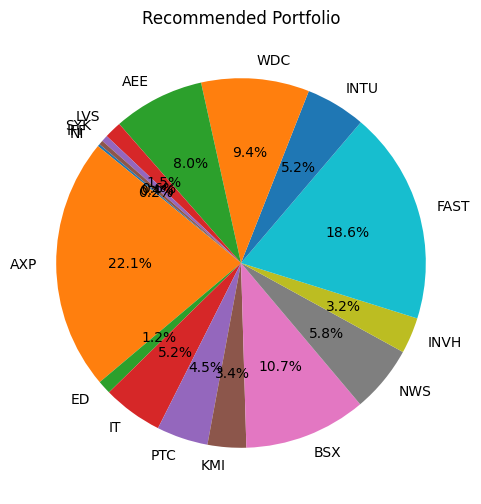

We recommend the following portfolio.
{'NI': 0.0021000000000000003, 'AXP': 0.2205, 'ED': 0.011900000000000004, 'IT': 0.05250000000000001, 'PTC': 0.04500000000000001, 'KMI': 0.03375000000000001, 'BSX': 0.10687500000000001, 'NWS': 0.05850000000000001, 'INVH': 0.03150000000000001, 'FAST': 0.18619999999999998, 'INTU': 0.05250000000000001, 'WDC': 0.09450000000000001, 'AEE': 0.0798, 'LVS': 0.015000000000000003, 'SYK': 0.0056250000000000015, 'IFF': 0.0037500000000000007}
The projected mean return of the portfolio is 0.654210%, and the 95% 5day VaR (in ROI percentage) is -2.578054%.

Amongst the numbers of portfolio weight configurations for the stocks ['NI', 'AXP', 'ED', 'IT', 'PTC', 'KMI', 'BSX', 'NWS', 'INVH', 'FAST', 'INTU', 'WDC', 'AEE', 'LVS', 'SYK', 'IFF'] we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.
Individual analysis and reason for selection of each stock we included in the list is attached below:

     

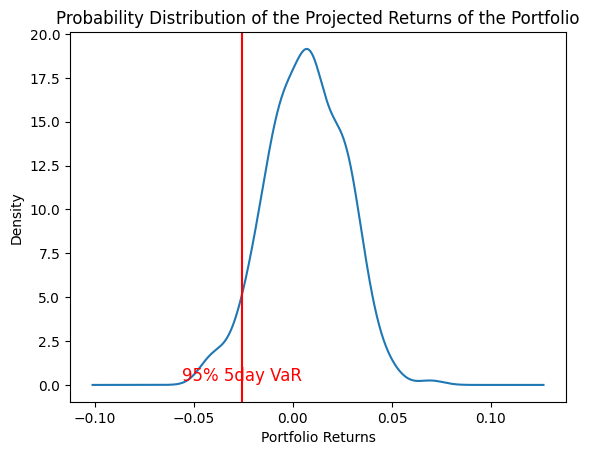

In [20]:
# Get user input
portfolio_type = 'growth' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.03
size = LARGE # SMALL, MEDIUM, LARGE
sectors = [] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)


### Medium Size Income Portfolio

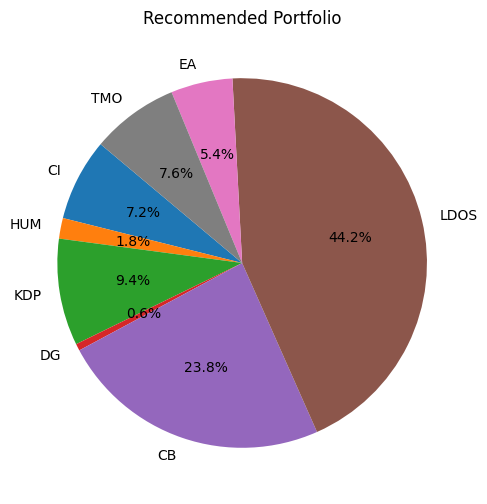

We recommend the following portfolio.
{'CI': 0.072, 'HUM': 0.018, 'KDP': 0.09350000000000001, 'DG': 0.006000000000000001, 'CB': 0.23799999999999996, 'LDOS': 0.442, 'EA': 0.054000000000000006, 'TMO': 0.07650000000000001}
The projected mean return of the portfolio is 0.658035%, and the 95% 5day VaR (in ROI percentage) is -1.963897%.

Amongst the numbers of portfolio weight configurations for the stocks ['CI', 'HUM', 'KDP', 'DG', 'CB', 'LDOS', 'EA', 'TMO'] we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.
Individual analysis and reason for selection of each stock we included in the list is attached below:

        CI: Healthcare sector
        CI is suitable for an income portfolio, since 
        1) We project the stock to achieve principle protection over the next 5 years
        2) It has relatively high dividend yield, as we project its dividend yields as ['0.0001', '0.0001', '0.0001', '0.0001', '0.0001'] over

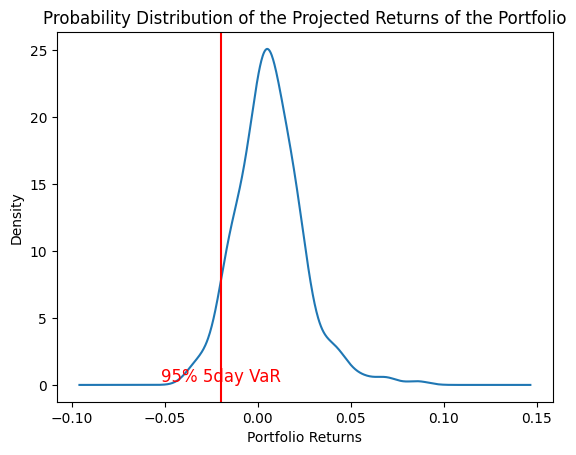

In [21]:
# Get user input
portfolio_type = 'income' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.03
size = MEDIUM # SMALL, MEDIUM, LARGE
sectors = [] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)


### Small Size ESG Portfolio

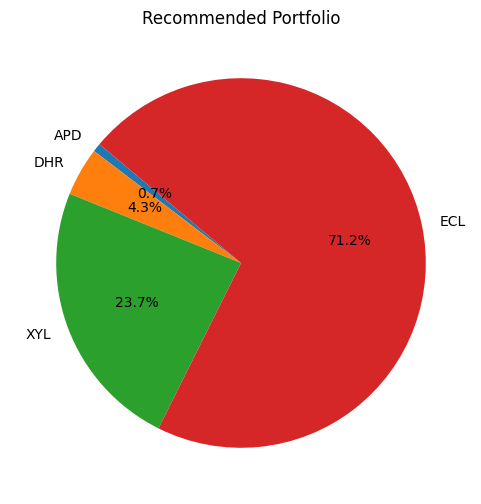

We recommend the following portfolio.
{'APD': 0.0075000000000000015, 'DHR': 0.04250000000000001, 'XYL': 0.23750000000000004, 'ECL': 0.7125}
The projected mean return of the portfolio is 0.509724%, and the 95% 5day VaR (in ROI percentage) is -2.899670%.

Amongst the numbers of portfolio weight configurations for the stocks ['APD', 'DHR', 'XYL', 'ECL'] we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.
Individual analysis and reason for selection of each stock we included in the list is attached below:

        APD: Basic Materials sector
        APD is suitable for an ESG portfolio, since it has an ESG risk score of 12.26, which outperforms its peers, which has an average ESG risk score of 25.816666666666663, and performs well in terms of both income and growth
        positive indications for income:
        1) We project the stock to achieve principle protection over the next 5 years
        2) It has relativel

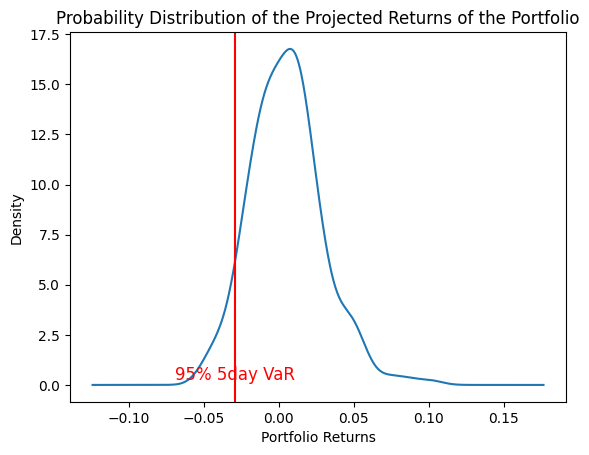

In [22]:
# Get user input
portfolio_type = 'esg' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.03
size = SMALL # SMALL, MEDIUM, LARGE
sectors = [] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)

### Medium Size Default Portfolio with Technology and Healthcare Stocks

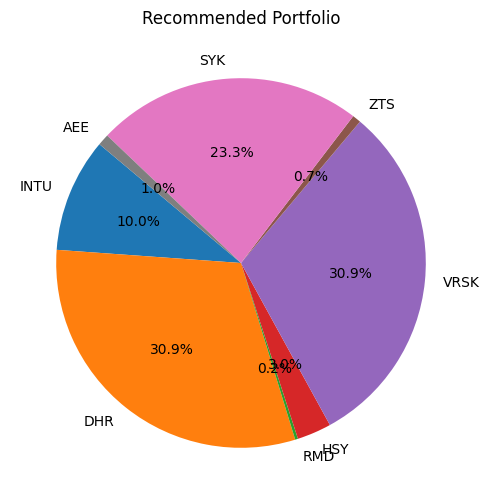

We recommend the following portfolio.
{'INTU': 0.09975000000000002, 'DHR': 0.30875, 'RMD': 0.002500000000000001, 'HSY': 0.030000000000000013, 'VRSK': 0.30875, 'ZTS': 0.007500000000000003, 'SYK': 0.23275, 'AEE': 0.010000000000000004}
The projected mean return of the portfolio is 0.299659%, and the 95% 5day VaR (in ROI percentage) is -2.978142%.

Amongst the numbers of portfolio weight configurations for the stocks ['INTU', 'DHR', 'RMD', 'HSY', 'VRSK', 'ZTS', 'SYK', 'AEE'] we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.
Individual analysis and reason for selection of each stock we included in the list is attached below:

        INTU: Technology sector
        INTU is suitable for an default portfolio, since we project it to perform well in terms of income and growth
        positive indications for income:
        1) We project the stock to achieve principle protection over the next 5 years
        2) It has r

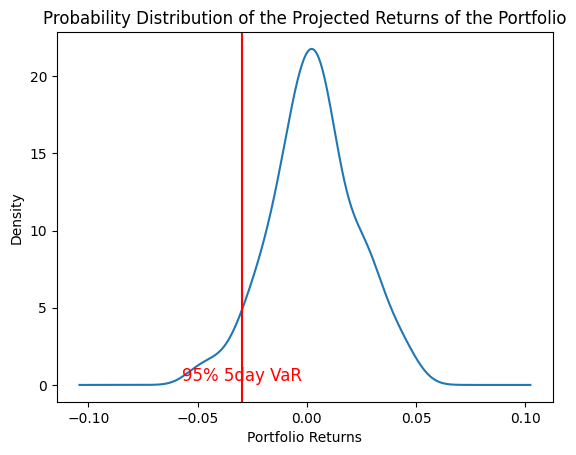

In [25]:
# Get user input
portfolio_type = 'default' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.03
size = MEDIUM # SMALL, MEDIUM, LARGE
sectors = ['Technology', 'Healthcare'] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)

### A Risk Averse User

Sometimes the program cannot find a portfolio that meets the user's demands

In [24]:
# Get user input
portfolio_type = 'default' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.015
size = MEDIUM # SMALL, MEDIUM, LARGE
sectors = [] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)

There were 100 unsuccessful attempts to find a portfolio of your choice. There are no portfolio options available for these prefernces. We recommend that you alter your preferences. (E.g. Have a lower risk tolerance value, or have looser sector preferences)


### A user with very specific sector preferences

Sometimes the program cannot find a portfolio that meets the user's demands

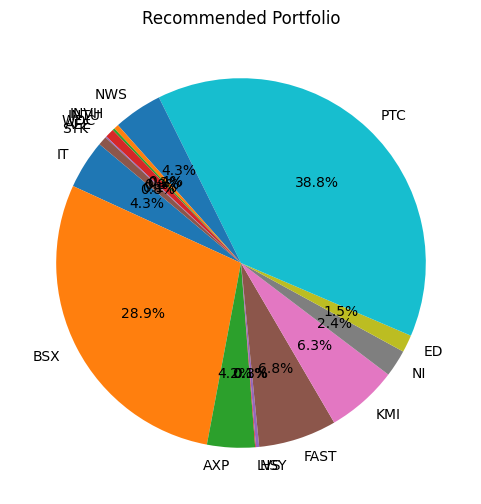

We recommend the following portfolio.
{'IT': 0.04275, 'BSX': 0.28880000000000006, 'AXP': 0.04180000000000001, 'LVS': 0.0007000000000000001, 'HSY': 0.0028000000000000004, 'FAST': 0.06839999999999999, 'KMI': 0.0627, 'NI': 0.023625, 'ED': 0.015200000000000003, 'PTC': 0.3876, 'NWS': 0.04275, 'INVH': 0.0042, 'INTU': 0.0019500000000000001, 'WDC': 0.007875, 'AEE': 0.00105, 'SYK': 0.0078000000000000005}
The projected mean return of the portfolio is 0.620998%, and the 95% 5day VaR (in ROI percentage) is -2.396329%.

Amongst the numbers of portfolio weight configurations for the stocks ['IT', 'BSX', 'AXP', 'LVS', 'HSY', 'FAST', 'KMI', 'NI', 'ED', 'PTC', 'NWS', 'INVH', 'INTU', 'WDC', 'AEE', 'SYK'] we simulated, we project that this weight configuration will yield the best return within the risk tolerance level specified.
Individual analysis and reason for selection of each stock we included in the list is attached below:

        IT: Technology sector
        IT is suitable for a growth portfolio

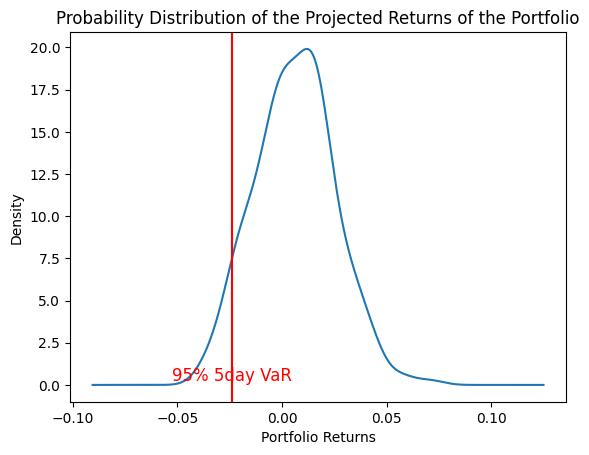

In [26]:
# Get user input
portfolio_type = 'growth' #'default', 'esg', 'income', 'growth'
risk_tolerance = -0.03
size = LARGE # SMALL, MEDIUM, LARGE
sectors = ['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy'] #['Technology', 'Healthcare', 'Financial Services', 'Consumer Cyclical', 'Consumer Defensive', 'Industrials', 'Energy', 'Utilities', 'Basic Materials', 'Real Estate', 'Communication Services']

recommend_portfolio(portfolio_type, risk_tolerance, size, sectors)